# Machine Learning Guided Insights on Mechanisms of Action of Molecular Jackhammers Against Cancer Cells

## Hamid Teimouri 


In [19]:
#!pip install rdkit
#!pip install mordred


In [25]:
import pandas as pd
import numpy as np
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import PandasTools
from rdkit import DataStructs
from mordred import Calculator, descriptors
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
#import session_info
#session_info.show()
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
import scipy.stats as stats
from pandas.api.types import is_numeric_dtype
from scipy.stats import mannwhitneyu
from sklearn.preprocessing import MinMaxScaler


## loading data 

In [27]:
df0 = pd.read_csv("MJH_Cancer_FlowCytometry.csv")
df0

,Molecule,SMILES_structures,VDA IC50,Tox. IC50,EPI
0,BL-204,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(C)C4=CC=C5C(...,0.12,0.600,4.6
1,GL-308-2,CC1(C)C(/C=C/C=C/C=C/C=C2N(C)C3=CC=C4C(C=CC=C4...,0.125,0.500,4.5
2,BL-141-2,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(C)C4=CC=C5C(...,0.15,0.750,2.5
3,BL-142,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(CCCCCCN(C)C)...,0.18,2.500,1.9
4,Cy7.5-amine,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(C)C4=CC=C5C(...,0.25,0.500,3.2
5,GL-356-2,CC1(C)C(/C=C/C=C/C=C/C=C2N(C)C3=CC=CC=C3C/2(C)...,0.26,NaN,NaN
6,GL-291-2,CC1(C)C(/C=C/C=C/C=C/C=C2N(C)C3=CC=C4C(C=CC=C4...,0.27,1.500,1.8
7,BL-141-1,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(C)C4=CC=C5C(...,0.3,0.125,3.6
8,GL-291-3,CC1(C)C(/C=C/C=C/C=C/C=C2N(CCCCCCN(C)C)C3=CC=C...,0.4,NaN,NaN
9,GL-249-2,CC1(C)C(/C=C/C2=C/C(CC(C(C)(C)C)C2)=C/C=C3N(C)...,NaN,NaN,NaN


## Remove molecules for which Tox and VDA are not available.
## To do so, we have to drop EPI column.

In [28]:
df = df0.drop(columns=['EPI'])
df

,Molecule,SMILES_structures,VDA IC50,Tox. IC50
0,BL-204,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(C)C4=CC=C5C(...,0.12,0.600
1,GL-308-2,CC1(C)C(/C=C/C=C/C=C/C=C2N(C)C3=CC=C4C(C=CC=C4...,0.125,0.500
2,BL-141-2,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(C)C4=CC=C5C(...,0.15,0.750
3,BL-142,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(CCCCCCN(C)C)...,0.18,2.500
4,Cy7.5-amine,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(C)C4=CC=C5C(...,0.25,0.500
5,GL-356-2,CC1(C)C(/C=C/C=C/C=C/C=C2N(C)C3=CC=CC=C3C/2(C)...,0.26,NaN
6,GL-291-2,CC1(C)C(/C=C/C=C/C=C/C=C2N(C)C3=CC=C4C(C=CC=C4...,0.27,1.500
7,BL-141-1,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(C)C4=CC=C5C(...,0.3,0.125
8,GL-291-3,CC1(C)C(/C=C/C=C/C=C/C=C2N(CCCCCCN(C)C)C3=CC=C...,0.4,NaN
9,GL-249-2,CC1(C)C(/C=C/C2=C/C(CC(C(C)(C)C)C2)=C/C=C3N(C)...,NaN,NaN


In [29]:
## number of missing values of Tox. IC50 ( 𝜇M) in FlowCytometry data
df1=df.dropna()
df2 = df1.reset_index(drop=True)
df2


,Molecule,SMILES_structures,VDA IC50,Tox. IC50
0,BL-204,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(C)C4=CC=C5C(...,0.12,0.600
1,GL-308-2,CC1(C)C(/C=C/C=C/C=C/C=C2N(C)C3=CC=C4C(C=CC=C4...,0.125,0.500
2,BL-141-2,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(C)C4=CC=C5C(...,0.15,0.750
3,BL-142,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(CCCCCCN(C)C)...,0.18,2.500
4,Cy7.5-amine,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(C)C4=CC=C5C(...,0.25,0.500
5,GL-291-2,CC1(C)C(/C=C/C=C/C=C/C=C2N(C)C3=CC=C4C(C=CC=C4...,0.27,1.500
6,BL-141-1,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(C)C4=CC=C5C(...,0.3,0.125
7,GL-297-2,CC1(C)C(/C=C/C(C)=C(C(OC)=O)/C=C/C=C2N(C)C3=CC...,0.75,1.000
8,GL-286,CC1(C)C(/C=C/C=C/C=C/C=C2N(C)C3=CC=C4C(C=CC=C4...,1,2.875
9,GL-176,CC1(C)C(/C=C/C=C/C=C/C=C2N(C)C3=CC=CC=C3C/2(C)...,1.2,0.250


In [30]:
df2=df2.drop(15)
df2

,Molecule,SMILES_structures,VDA IC50,Tox. IC50
0,BL-204,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(C)C4=CC=C5C(...,0.12,0.600
1,GL-308-2,CC1(C)C(/C=C/C=C/C=C/C=C2N(C)C3=CC=C4C(C=CC=C4...,0.125,0.500
2,BL-141-2,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(C)C4=CC=C5C(...,0.15,0.750
3,BL-142,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(CCCCCCN(C)C)...,0.18,2.500
4,Cy7.5-amine,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(C)C4=CC=C5C(...,0.25,0.500
5,GL-291-2,CC1(C)C(/C=C/C=C/C=C/C=C2N(C)C3=CC=C4C(C=CC=C4...,0.27,1.500
6,BL-141-1,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(C)C4=CC=C5C(...,0.3,0.125
7,GL-297-2,CC1(C)C(/C=C/C(C)=C(C(OC)=O)/C=C/C=C2N(C)C3=CC...,0.75,1.000
8,GL-286,CC1(C)C(/C=C/C=C/C=C/C=C2N(C)C3=CC=C4C(C=CC=C4...,1,2.875
9,GL-176,CC1(C)C(/C=C/C=C/C=C/C=C2N(C)C3=CC=CC=C3C/2(C)...,1.2,0.250


# visualization of the molecules

In [31]:
#!pip install Pillow

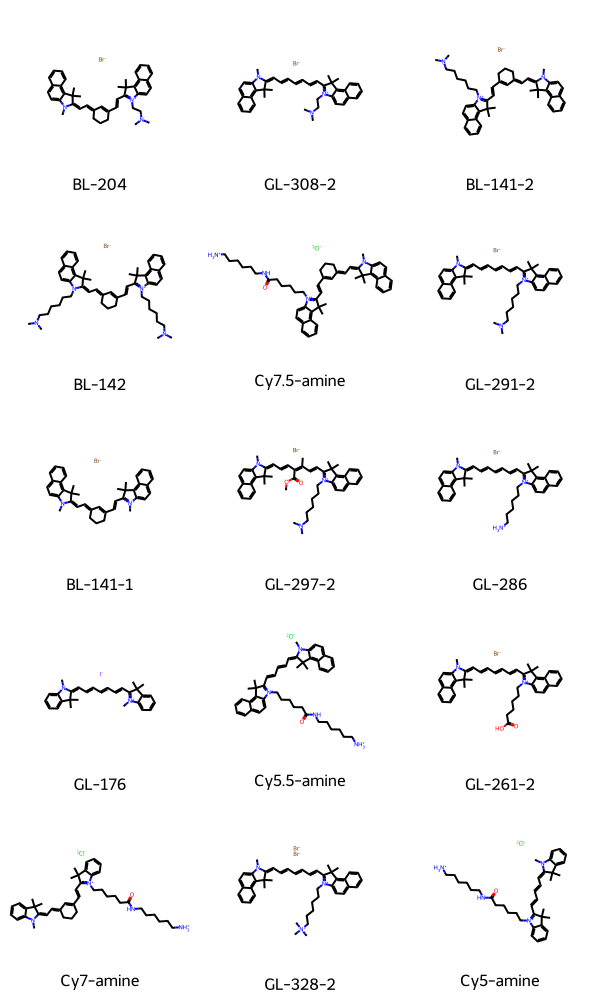

In [32]:
from rdkit import Chem
from rdkit.Chem import Draw
# Assuming df2 is your DataFrame and it has columns 'SMILES_structures' and 'Molecule'.
# Convert SMILES to 2D molecules:
molecules = df2.SMILES_structures.apply(Chem.MolFromSmiles)
# Make sure you only take the first 15 molecules if you want a 5x3 grid
selected_molecules = molecules[:15]
# Generate a grid image with 5 rows and 3 columns
img = Draw.MolsToGridImage(selected_molecules, subImgSize=(200, 200), molsPerRow=3,
                           legends=[str(x) for x in df2.Molecule[:15]], useSVG=False)

# Display the image in Jupyter Notebook
img


In [33]:
#dictionary = ddf2.to_dict(orient='list')
#dictionary

## Calculate 1826 molecular descriptors using Mordred
https://jcheminf.biomedcentral.com/articles/10.1186/s13321-018-0258-y

In [34]:
def All_Mordred_descriptors(data):
    calc = Calculator(descriptors, ignore_3D=False)
    mols = [Chem.MolFromSmiles(smi) for smi in data]
    #print(mols)
    # pandas df
    df = calc.pandas(mols)
    return df

In [40]:
#mordred_descriptors = All_Mordred_descriptors(df2['SMILES_structures'])
#mordred_descriptors

In [36]:
#mordred_descriptors.shape
#mordred_descriptors

In [37]:
df3=df2.reset_index()
df3.drop(columns=['index'])

,Molecule,SMILES_structures,VDA IC50,Tox. IC50
0,BL-204,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(C)C4=CC=C5C(...,0.12,0.600
1,GL-308-2,CC1(C)C(/C=C/C=C/C=C/C=C2N(C)C3=CC=C4C(C=CC=C4...,0.125,0.500
2,BL-141-2,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(C)C4=CC=C5C(...,0.15,0.750
3,BL-142,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(CCCCCCN(C)C)...,0.18,2.500
4,Cy7.5-amine,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(C)C4=CC=C5C(...,0.25,0.500
5,GL-291-2,CC1(C)C(/C=C/C=C/C=C/C=C2N(C)C3=CC=C4C(C=CC=C4...,0.27,1.500
6,BL-141-1,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(C)C4=CC=C5C(...,0.3,0.125
7,GL-297-2,CC1(C)C(/C=C/C(C)=C(C(OC)=O)/C=C/C=C2N(C)C3=CC...,0.75,1.000
8,GL-286,CC1(C)C(/C=C/C=C/C=C/C=C2N(C)C3=CC=C4C(C=CC=C4...,1,2.875
9,GL-176,CC1(C)C(/C=C/C=C/C=C/C=C2N(C)C3=CC=CC=C3C/2(C)...,1.2,0.250


In [38]:
# Now we must merge two dataframes df3 and mordred_descriptors
#result = pd.concat([df3, mordred_descriptors], axis=1, join="inner")
#result
# Save result as a CSV file
#result.to_csv('dye_descriptors_collapsed2.csv', index=False)

# Upload mordred descriptors for all molecules

In [41]:
descriptors_loaded = pd.read_csv('dye_descriptors_collapsed2.csv')
descriptors_loaded.head()

,index,Molecule,SMILES_structures,VDA IC50,Tox. IC50,ABC,ABCGG,nAcid,nBase,SpAbs_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0,BL-204,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(C)C4=CC=C5C(...,0.120,0.60,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,2,multiple fragments (SpAbs_A/SpAbs),...,11.069369,102.579149,685.303161,7.213717,4600008380,88,262.0,323.0,divide by zero encountered in power (mZagreb1),9.694444
1,1,GL-308-2,CC1(C)C(/C=C/C=C/C=C/C=C2N(C)C3=CC=C4C(C=CC=C4...,0.125,0.50,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,2,multiple fragments (SpAbs_A/SpAbs),...,10.982356,99.134194,645.271861,7.332635,4300007448,81,240.0,295.0,divide by zero encountered in power (mZagreb1),9.194444
2,2,BL-141-2,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(C)C4=CC=C5C(...,0.150,0.75,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,2,multiple fragments (SpAbs_A/SpAbs),...,11.084801,106.786121,741.365761,6.928652,5000010854,92,278.0,339.0,divide by zero encountered in power (mZagreb1),10.694444
3,3,BL-142,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(CCCCCCN(C)C)...,0.180,2.50,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,3,multiple fragments (SpAbs_A/SpAbs),...,11.133844,115.232263,854.486210,6.572971,5800016355,101,312.0,374.0,divide by zero encountered in power (mZagreb1),12.611111
4,4,Cy7.5-amine,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(C)C4=CC=C5C(...,0.250,0.50,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,2,multiple fragments (SpAbs_A/SpAbs),...,11.113268,113.090974,750.507464,6.202541,5600015770,99,302.0,364.0,divide by zero encountered in power (mZagreb1),12.277778


In [42]:
descriptors_loaded2 = descriptors_loaded.drop(columns=['index'])
descriptors_loaded2.head()

,Molecule,SMILES_structures,VDA IC50,Tox. IC50,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,BL-204,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(C)C4=CC=C5C(...,0.120,0.60,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,2,multiple fragments (SpAbs_A/SpAbs),multiple fragments (SpMax_A/SpMax),...,11.069369,102.579149,685.303161,7.213717,4600008380,88,262.0,323.0,divide by zero encountered in power (mZagreb1),9.694444
1,GL-308-2,CC1(C)C(/C=C/C=C/C=C/C=C2N(C)C3=CC=C4C(C=CC=C4...,0.125,0.50,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,2,multiple fragments (SpAbs_A/SpAbs),multiple fragments (SpMax_A/SpMax),...,10.982356,99.134194,645.271861,7.332635,4300007448,81,240.0,295.0,divide by zero encountered in power (mZagreb1),9.194444
2,BL-141-2,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(C)C4=CC=C5C(...,0.150,0.75,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,2,multiple fragments (SpAbs_A/SpAbs),multiple fragments (SpMax_A/SpMax),...,11.084801,106.786121,741.365761,6.928652,5000010854,92,278.0,339.0,divide by zero encountered in power (mZagreb1),10.694444
3,BL-142,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(CCCCCCN(C)C)...,0.180,2.50,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,3,multiple fragments (SpAbs_A/SpAbs),multiple fragments (SpMax_A/SpMax),...,11.133844,115.232263,854.486210,6.572971,5800016355,101,312.0,374.0,divide by zero encountered in power (mZagreb1),12.611111
4,Cy7.5-amine,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(C)C4=CC=C5C(...,0.250,0.50,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,2,multiple fragments (SpAbs_A/SpAbs),multiple fragments (SpMax_A/SpMax),...,11.113268,113.090974,750.507464,6.202541,5600015770,99,302.0,364.0,divide by zero encountered in power (mZagreb1),12.277778


## Now we remove all non-numeric features

In [45]:
import pandas as pd
import numpy as np
descriptors_loaded3=descriptors_loaded2
# Convert columns to numeric values, setting errors='coerce' to turn problematic entries into NaNs
descriptors_loaded3['Tox. IC50'] = pd.to_numeric(descriptors_loaded3['Tox. IC50'], errors='coerce')
descriptors_loaded3['VDA IC50'] = pd.to_numeric(descriptors_loaded3['VDA IC50'], errors='coerce')

#descriptors_loaded3

In [46]:
import pandas as pd

# Assuming df is your dataframe
df_numeric = descriptors_loaded3.select_dtypes(include=['number'])
df_numeric1= df_numeric.drop(columns=['Tox. IC50','VDA IC50'])
df_numeric1.head()


,nAcid,nBase,nAromAtom,nAromBond,nAtom,nHeavyAtom,nSpiro,nBridgehead,nHetero,nH,...,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2
0,1,2,20,22,95,47,0,0,4,48,...,8.078068,11.069369,102.579149,685.303161,7.213717,4600008380,88,262.0,323.0,9.694444
1,1,2,20,22,88,44,0,0,4,44,...,8.078068,10.982356,99.134194,645.271861,7.332635,4300007448,81,240.0,295.0,9.194444
2,1,2,20,22,107,51,0,0,4,56,...,8.078068,11.084801,106.786121,741.365761,6.928652,5000010854,92,278.0,339.0,10.694444
3,1,3,20,22,130,59,0,0,5,71,...,8.083637,11.133844,115.232263,854.486210,6.572971,5800016355,101,312.0,374.0,12.611111
4,1,2,20,22,121,57,0,0,6,64,...,8.078068,11.113268,113.090974,750.507464,6.202541,5600015770,99,302.0,364.0,12.277778


#  Elucidating the correlations between VDA and molecular features

In [47]:
list_descriptors = list(descriptors_loaded3.columns)
list_descriptors.remove('VDA IC50')

In [48]:
Tr=0.77

C:\Users\temih\Anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\temih\Anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


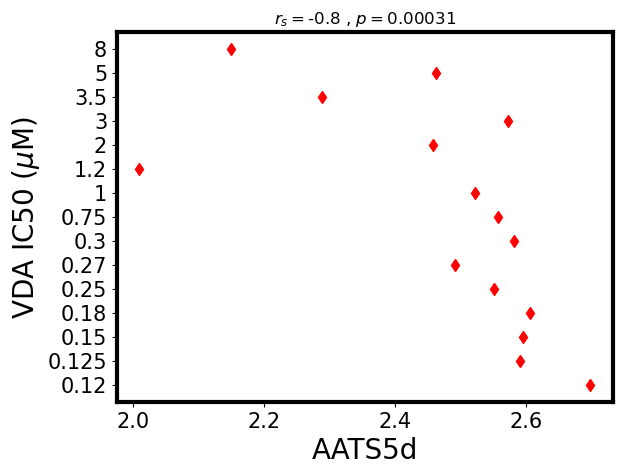

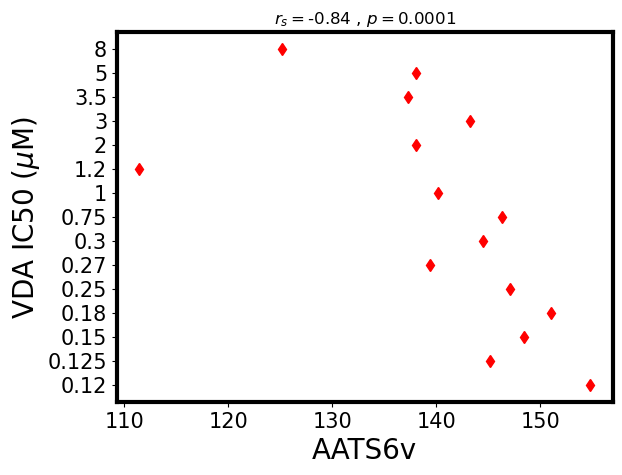

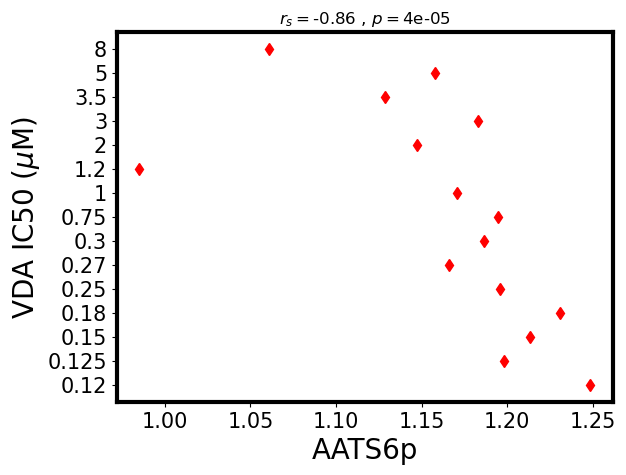

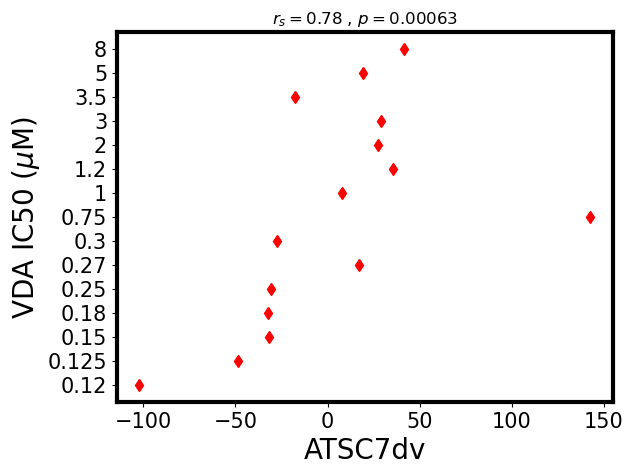

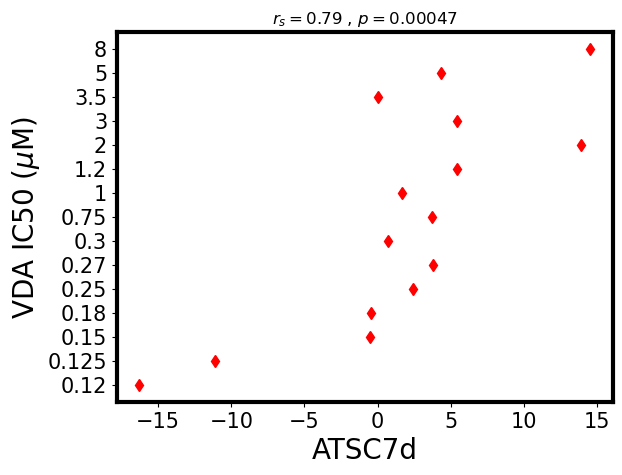

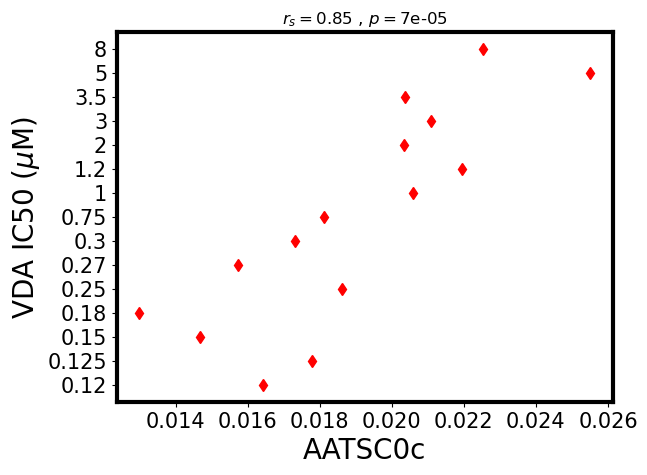

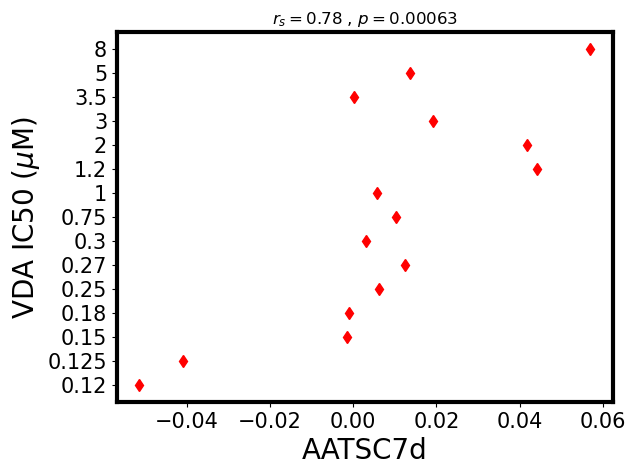

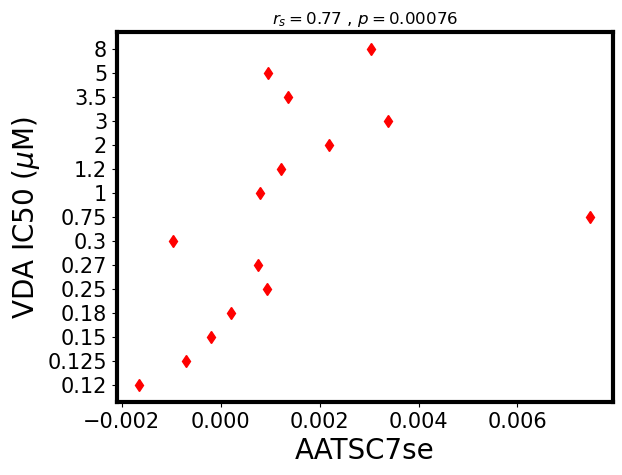

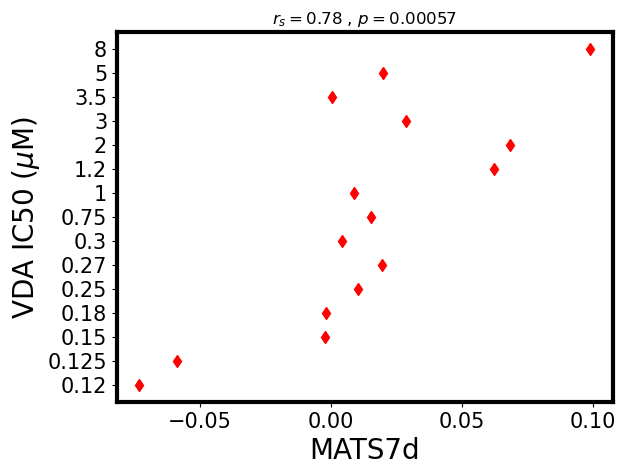

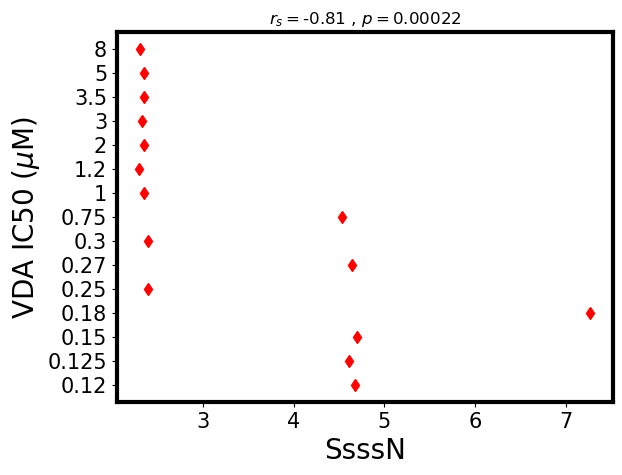

In [57]:
# now we can calculte correlations between each descriptor and toxcicity
selected_features_VDA = []
spearman_list= [] 
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
#for columns in descriptors_loaded.columns: #mordred_descriptors:
#    if is_numeric_dtype(mordred_descriptors[columns]):
for columns in list_descriptors:
    if is_numeric_dtype(descriptors_loaded3[columns]):
        d_array = np.array(list(descriptors_loaded3[columns]))
        #st=stats.spearmanr(mordred_descriptors[columns],ddf2['VDA IC50 ($\mu$M)'])
        #st=stats.spearmanr(mordred_descriptors[columns],ddf2['Tox. IC50 ($\mu$M)'])
        st=stats.spearmanr(descriptors_loaded3[columns],df2['VDA IC50'])
        spearman_list.append(st[0])
        if st[0]>Tr or st[0]<-Tr:
            if st[1]<0.005:
                
                plt.figure()
                #print(columns,st)
                selected_features_VDA.append(columns)
                #plt.plot(mordred_descriptors[columns],ddf2['VDA IC50 ($\mu$M)'],'d',linewidth=7, color='red')
                #plt.plot(np.log(mordred_descriptors[columns]),np.log(ddf2['Tox. IC50 ($\mu$M)']),'d',linewidth=7, color='red')
                #plt.plot(mordred_descriptors[columns],ddf2['Tox. IC50 ($\mu$M)'],'d',linewidth=7, color='red')
                plt.plot(descriptors_loaded3[columns],df2['VDA IC50'],'d',linewidth=7, color='red')

                #plt.axis([8, 12, 0.04, 1.6])
                plt.grid(False)
                plt.xlabel(columns,  fontsize=20)
                plt.ylabel('VDA IC50 ($\mu$M)' ,  fontsize=20)
                plt.tick_params(labelsize=15)
                plt.rcParams["axes.edgecolor"]="black"
                plt.rcParams["axes.linewidth"]=3
                #plt.title(st)
                plt.title('$r_s=$' + str(round(st[0], 2))+' , '+'$p=$' + str(round(st[1], 5)))

                #plt.legend(loc='upper right', fontsize=18)
                #plt.figtext(0.45,0.94,'(c)',size=20)
                plt.savefig('VDA_figs/VDA_'+columns+'.pdf', bbox_inches='tight')

                #plt.show()

In [58]:
selected_features_VDA

['AATS5d',
 'AATS6v',
 'AATS6p',
 'ATSC7dv',
 'ATSC7d',
 'AATSC0c',
 'AATSC7d',
 'AATSC7se',
 'MATS7d',
 'SsssN']

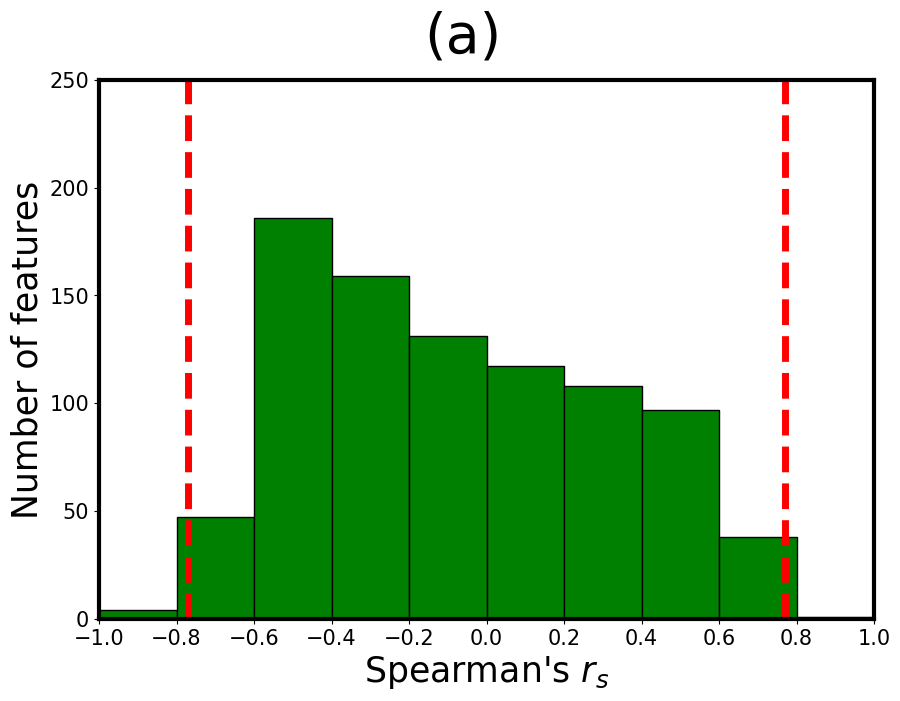

In [59]:
#import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
#plt.grid(False)
plt.hist(spearman_list, color = 'green', edgecolor = 'black',
        bins = [-1,-0.8,-0.60,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1.0])
#locs, labels = plt.yticks() 
plt.vlines(x=-Tr,ymin=0,ymax=387,color='r',linestyle='--',linewidth=5)
plt.vlines(x=Tr,ymin=0,ymax=387,color='r',linestyle='--',linewidth=5)

#plt.savefig('corr_distributions.pdf', bbox_inches='tight')
plt.ylim([0,250])
plt.xlim([-1,1])

plt.xlabel("Spearman's $r_s$" ,  fontsize=25)
#plt.xlabel("Distance in Selected Features" ,  fontsize=15)
plt.ylabel('Number of features',fontsize=25)
plt.xticks([-1,-0.8,-0.60,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(labelsize=15) #12.5
plt.rcParams["axes.edgecolor"]="black"
plt.rcParams["axes.linewidth"]=2
plt.figtext(0.45,0.92,'(a)',size=40)
plt.savefig('VDA_figs/VDA_histogram'+'.pdf', bbox_inches='tight')


C:\Users\temih\Anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


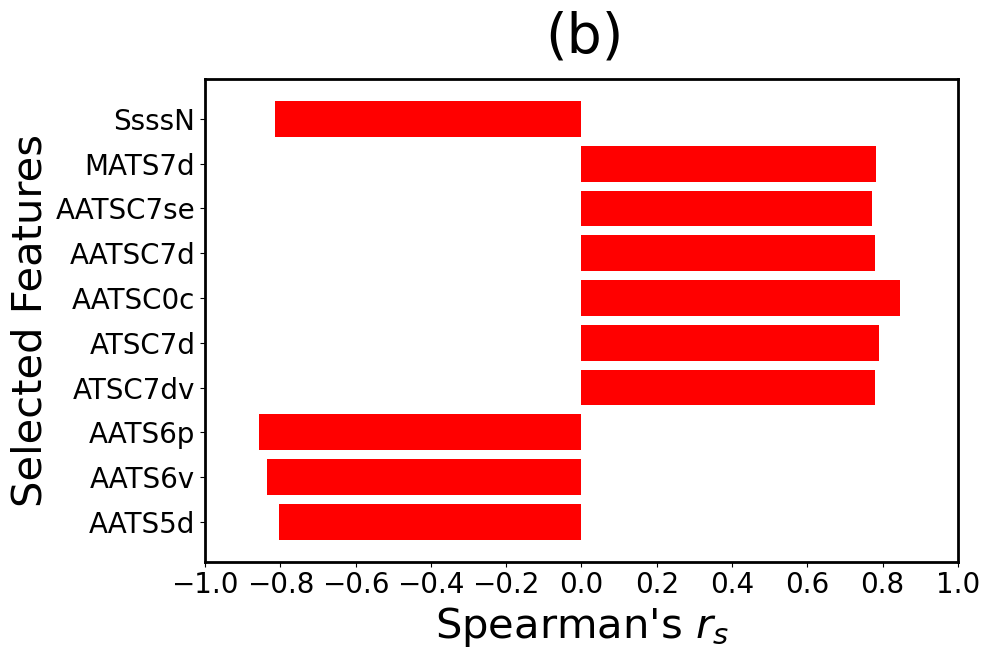

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from pandas.api.types import is_numeric_dtype

# Assuming Tr is defined somewhere above in your script
# Tr = ...

selected_features_TI = []
spearman_coefficients = [] 
feature_names = []

# Assuming descriptors_loaded3 and df2 are defined and loaded properly
# descriptors_loaded3 = ...
# df2 = ...

# Ensure the column 'Molecule #' is not in the list_descriptors if it's not a feature
#list_descriptors = [col for col in descriptors_loaded3.columns if col != 'Molecule #' and is_numeric_dtype(descriptors_loaded3[col])]

# Loop through each feature and calculate Spearman correlation
for column in list_descriptors:
    correlation, p_value = spearmanr(descriptors_loaded3[column], df2['VDA IC50'])
    
    # Check if the absolute correlation is larger than Tr and p-value is less than 0.005
    if abs(correlation) > Tr and p_value < 0.005:
        selected_features_TI.append(column)
        spearman_coefficients.append(correlation)
        feature_names.append(column)

# Check if there are any significant features to plot
if feature_names:
    # Now, plot the significant Spearman correlation coefficients
    plt.figure(figsize=(10,6))  # Adjust the figure size as necessary, depending on the number of features
    #plt.figure(figsize=(8, len(feature_names) * 0.7))  # Adjust the figure size as necessary, depending on the number of features
    plt.barh(feature_names, spearman_coefficients, color='red')

    # Set the range and increments for the x-axis
    plt.xticks(np.arange(-1, 1.2, 0.2))  # np.arange includes the start value but excludes the end value, hence 1.2 to include 1.0

    # Add labels and title
    plt.xlabel("Spearman's $r_s$", fontsize=30)
    plt.ylabel('Selected Features', fontsize=30)
    #plt.title('Feature Importance based on Spearman Correlation')
    plt.tick_params(labelsize=20)
    plt.rcParams["axes.edgecolor"]="black"
    plt.rcParams["axes.linewidth"]=3
    # Rotate the feature names for better readability, if necessary
    plt.yticks(rotation=0)  
    
    plt.tight_layout()  # Adjust the layout

    # Save the plot
    plt.figtext(0.55,1.02,'(b)',size=40)
    plt.savefig('VDA_feature_importance.pdf', bbox_inches='tight')
    plt.show()  # Uncomment if you want to display the plot as well
else:
    print("No features met the significance criteria for plotting.")


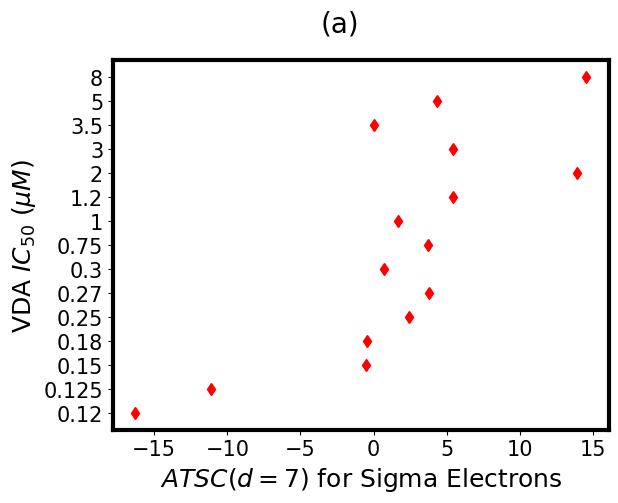

In [61]:
import matplotlib.pyplot as plt

plt.figure()
#ax = plt.gca()  # Get the current axes instance

columns = 'ATSC7d'
plt.plot(descriptors_loaded3[columns], df2['VDA IC50'], 'd', linewidth=7, color='red')
# Set the y-axis ticks and labels manually
# Set aspect of the plot to be equal
#plt.axis([-18, 17, 0, 15])

# Set the y-axis ticks and labels manually if needed
plt.grid(False)
#plt.xlabel('Autocorrelation of Sigma Electrons', fontsize=20)
plt.xlabel('$ATSC(d=7)$ for Sigma Electrons', fontsize=18)
plt.ylabel('VDA $IC_{50}$ ($\mu M$)', fontsize=18)
# Set specific y-axis ticks
plt.tick_params(labelsize=15)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 3
plt.figtext(0.45, 0.94, '(a)', size=20)

plt.savefig('scatter_VDA_' + columns + '.pdf', bbox_inches='tight')

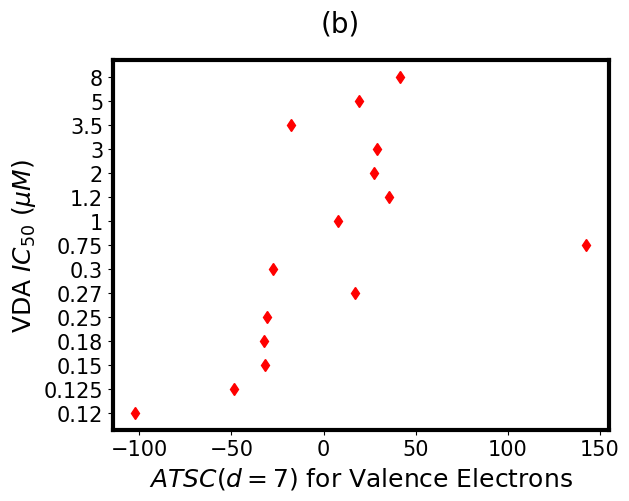

In [62]:
import matplotlib.pyplot as plt

plt.figure()
#ax = plt.gca()  # Get the current axes instance
columns = 'ATSC7dv'
plt.plot(descriptors_loaded3[columns], df2['VDA IC50'], 'd', linewidth=7, color='red')
# Set the y-axis ticks and labels manually
# Set aspect of the plot to be equal
#plt.axis([-18, 17, 0, 15])
# Set the y-axis ticks and labels manually if needed
plt.grid(False)
#plt.xlabel('Autocorrelation of Sigma Electrons', fontsize=20)
plt.xlabel('$ATSC(d=7)$ for Valence Electrons', fontsize=18)

plt.ylabel('VDA $IC_{50}$ ($\mu M$)', fontsize=18)
# Set specific y-axis ticks
plt.tick_params(labelsize=15)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 3
plt.figtext(0.45, 0.94, '(b)', size=20)

plt.savefig('scatter_VDA_' + columns + '.pdf', bbox_inches='tight')

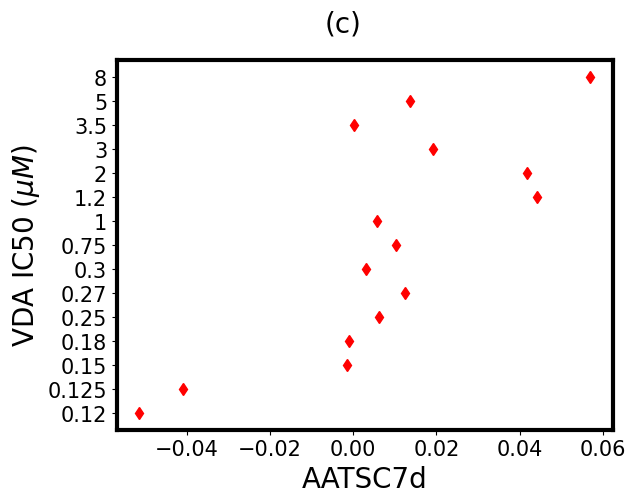

In [63]:
import matplotlib.pyplot as plt

plt.figure()
ax = plt.gca()  # Get the current axes instance

columns = 'AATSC7d'
plt.plot(descriptors_loaded3[columns], df2['VDA IC50'], 'd', linewidth=7, color='red')
# Set the y-axis ticks and labels manually
# Set aspect of the plot to be equal

# Set the y-axis ticks and labels manually if needed
plt.grid(False)
plt.xlabel(columns, fontsize=20)
plt.ylabel('VDA IC50 ($\mu M$)', fontsize=20)

# Set specific y-axis ticks
plt.tick_params(labelsize=15)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 3
plt.figtext(0.45, 0.94, '(c)', size=20)

plt.savefig('scatter_VDA_' + columns + '.pdf', bbox_inches='tight')

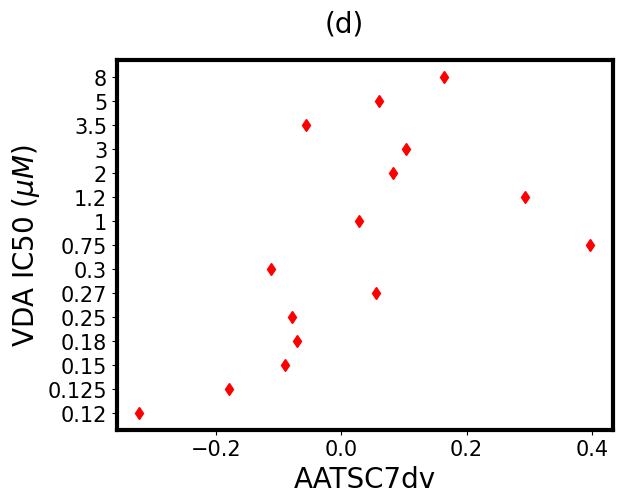

In [64]:
import matplotlib.pyplot as plt

plt.figure()
ax = plt.gca()  # Get the current axes instance

columns = 'AATSC7dv'
plt.plot(descriptors_loaded3[columns], df2['VDA IC50'], 'd', linewidth=7, color='red')
# Set the y-axis ticks and labels manually
# Set aspect of the plot to be equal

# Set the y-axis ticks and labels manually if needed
plt.grid(False)
plt.xlabel(columns, fontsize=20)
plt.ylabel('VDA IC50 ($\mu M$)', fontsize=20)

# Set specific y-axis ticks
plt.tick_params(labelsize=15)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 3
plt.figtext(0.45, 0.94, '(d)', size=20)

plt.savefig('scatter_VDA_' + columns + '.pdf', bbox_inches='tight')

In [66]:
df_mordred=pd.read_excel('definitions_descriptors_mordred.xlsx', index_col=None, header=1)
df_mordred.head()

,index,module,name,constructor,dimention,description
0,1,ABCIndex,ABC,ABCIndex(),2D,atom-bond connectivity index
1,2,NaN,ABCGG,ABCGGIndex(),2D,Graovac-Ghorbani atom-bond connectivity index
2,3,AcidBase,nAcid,AcidicGroupCount(),2D,acidic group count
3,4,NaN,nBase,BasicGroupCount(),2D,basic group count
4,5,AdjacencyMatrix,SpAbs_A,AdjacencyMatrix('SpAbs'),2D,SpAbs of adjacency matrix


In [67]:
i=0
feature_dict_VDA={}
for elements in df_mordred['name']:
    i=i+1
    for items in selected_features_VDA:
        if items==elements:
            print(elements,df_mordred['description'].loc[i])
            feature_dict_VDA[elements]=df_mordred['description'].loc[i]

AATS5d averaged moreau-broto autocorrelation of lag 6 weighted by sigma electrons
AATS6v averaged moreau-broto autocorrelation of lag 7 weighted by vdw volume
AATS6p averaged moreau-broto autocorrelation of lag 7 weighted by polarizability
ATSC7dv centered moreau-broto autocorrelation of lag 8 weighted by valence electrons
ATSC7d centered moreau-broto autocorrelation of lag 8 weighted by sigma electrons
AATSC0c averaged and centered moreau-broto autocorrelation of lag 1 weighted by gasteiger charge
AATSC7d averaged and centered moreau-broto autocorrelation of lag 8 weighted by sigma electrons
AATSC7se averaged and centered moreau-broto autocorrelation of lag 8 weighted by sanderson EN
MATS7d moran coefficient of lag 8 weighted by sigma electrons
SsssN sum of ddsN


# Elucidating the correlations between Tox and molecular features

In [68]:
Tr=0.7

In [69]:
list_descriptors = list(descriptors_loaded3.columns)
list_descriptors.remove('Tox. IC50')

C:\Users\temih\Anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\temih\Anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\temih\Anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


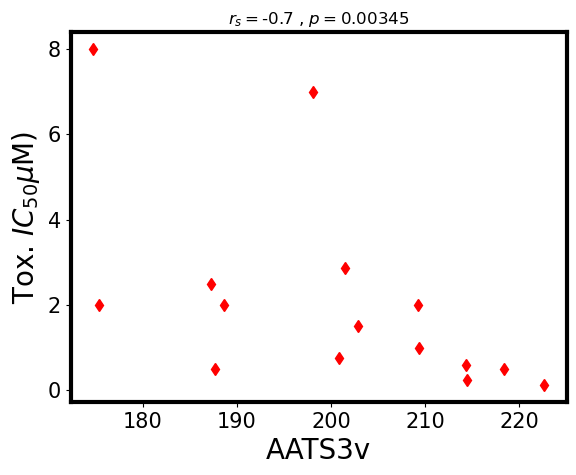

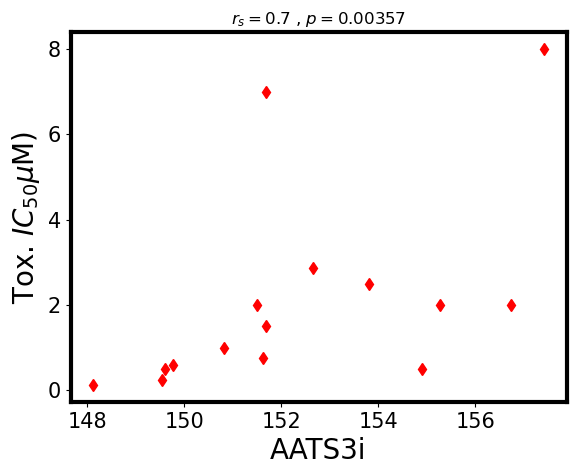

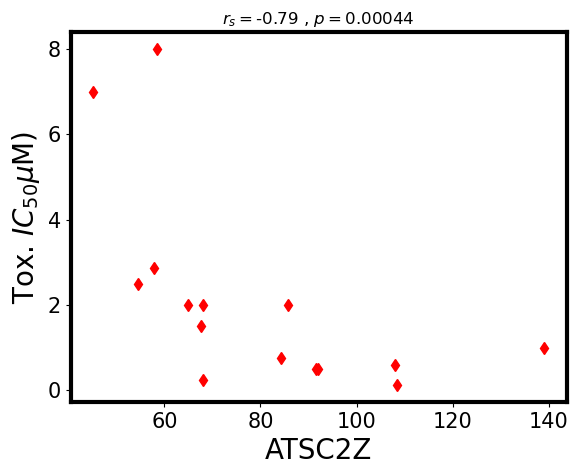

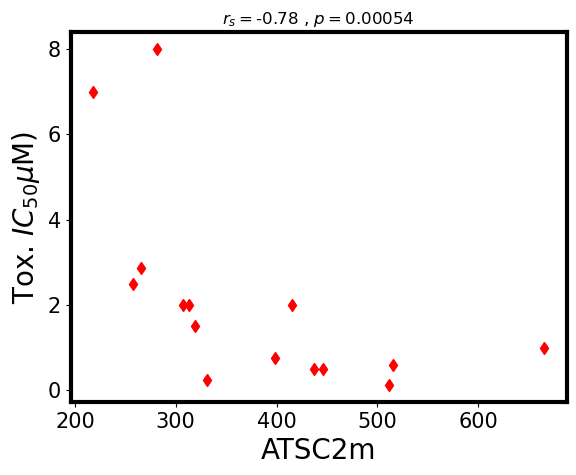

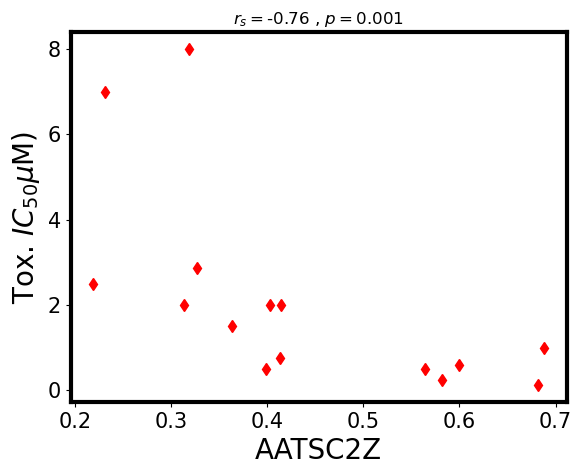

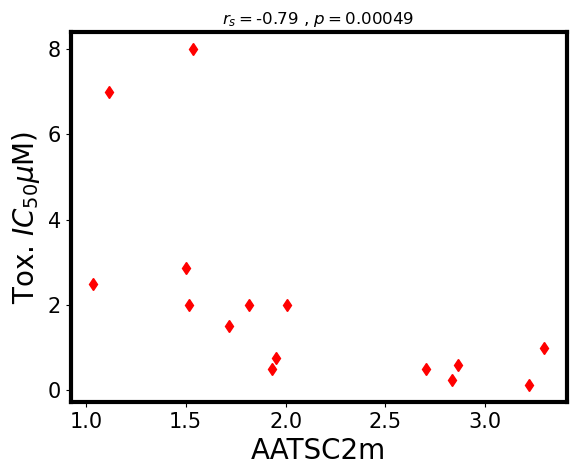

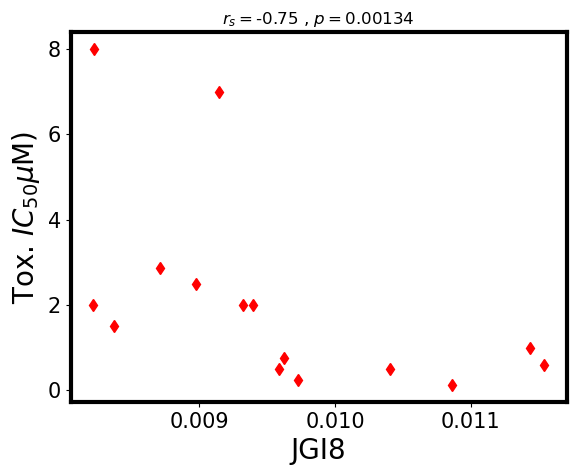

In [70]:
# now we can calculte correlations between each descriptor and toxcicity
selected_features_Tox = []
spearman_list= [] 

import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
#for columns in descriptors_loaded.columns: #mordred_descriptors:
#    if is_numeric_dtype(mordred_descriptors[columns]):
for columns in list_descriptors:
    #print(columns)
    
    if columns!='Tox. IC50' and is_numeric_dtype(descriptors_loaded3[columns]):
        d_array = np.array(list(descriptors_loaded3[columns]))
        #st=stats.spearmanr(mordred_descriptors[columns],ddf2['VDA IC50 ($\mu$M)'])
        #st=stats.spearmanr(mordred_descriptors[columns],ddf2['Tox. IC50 ($\mu$M)'])
        st=stats.spearmanr(descriptors_loaded3[columns],df2['Tox. IC50'])
        spearman_list.append(st[0])
        if st[0]>Tr or st[0]<-Tr:
            if st[1]<0.005:
                
                plt.figure()
                #print(columns,st)
                selected_features_Tox.append(columns)
                #plt.plot(mordred_descriptors[columns],ddf2['VDA IC50 ($\mu$M)'],'d',linewidth=7, color='red')
                #plt.plot(np.log(mordred_descriptors[columns]),np.log(ddf2['Tox. IC50 ($\mu$M)']),'d',linewidth=7, color='red')
                #plt.plot(mordred_descriptors[columns],ddf2['Tox. IC50 ($\mu$M)'],'d',linewidth=7, color='red')
                plt.plot(descriptors_loaded3[columns],df2['Tox. IC50'],'d',linewidth=7, color='red')

    #plt.axis([8, 12, 0.04, 1.6])
                plt.grid(False)
                plt.xlabel(columns,  fontsize=20)
                #plt.ylabel("VDA $IC_{50}$$\mu$M)" ,  fontsize=20)
                plt.ylabel("Tox. $IC_{50}$$\mu$M)" ,  fontsize=20)
                plt.tick_params(labelsize=15)
                plt.rcParams["axes.edgecolor"]="black"
                plt.rcParams["axes.linewidth"]=3
                #plt.title(st)
                plt.title('$r_s=$' + str(round(st[0], 2))+' , '+'$p=$' + str(round(st[1], 5)))

                #plt.legend(loc='upper right', fontsize=18)
                #plt.figtext(0.45,0.94,'(c)',size=20)
                plt.savefig('Tox_figs/Tox'+columns+'.pdf', bbox_inches='tight')

                #plt.show()


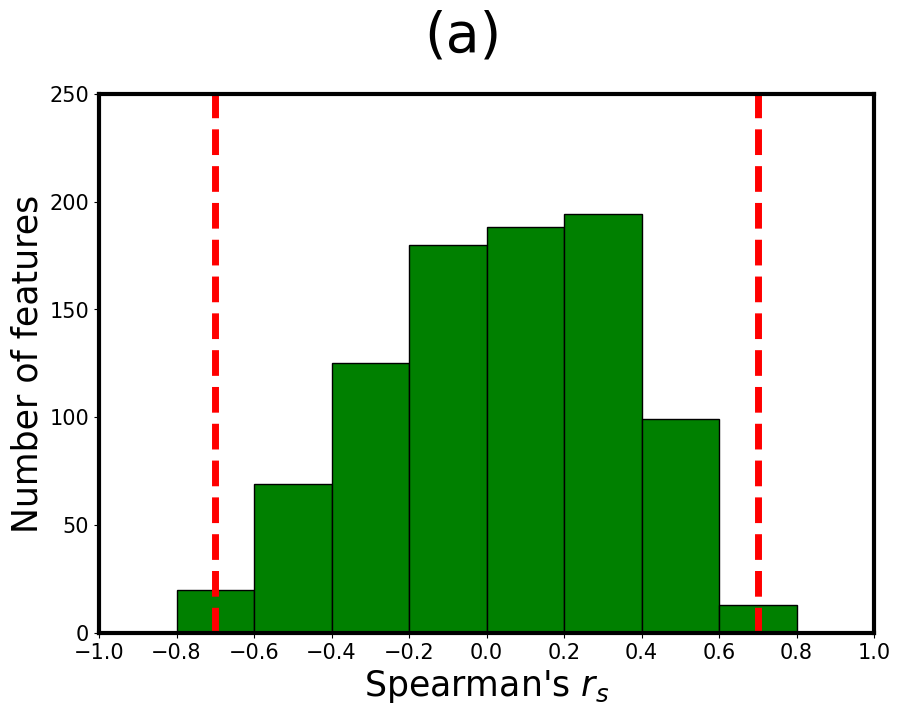

In [71]:
#import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
#plt.grid(False)
plt.hist(spearman_list, color = 'green', edgecolor = 'black',
        bins = [-1,-0.8,-0.60,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1.0])
#locs, labels = plt.yticks() 
plt.vlines(x=-Tr,ymin=0,ymax=387,color='r',linestyle='--',linewidth=5)
plt.vlines(x=Tr,ymin=0,ymax=387,color='r',linestyle='--',linewidth=5)

#plt.savefig('corr_distributions.pdf', bbox_inches='tight')
plt.ylim([0,250])
plt.xlim([-1,1])

plt.xlabel("Spearman's $r_s$" ,  fontsize=25)
#plt.xlabel("Distance in Selected Features" ,  fontsize=15)
plt.ylabel('Number of features',fontsize=25)
plt.xticks([-1,-0.8,-0.60,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(labelsize=15) #12.5
plt.rcParams["axes.edgecolor"]="black"
plt.rcParams["axes.linewidth"]=2
plt.figtext(0.45,0.94,'(a)',size=40)
plt.savefig('Tox_figs/Tox_histogram'+'.pdf', bbox_inches='tight')

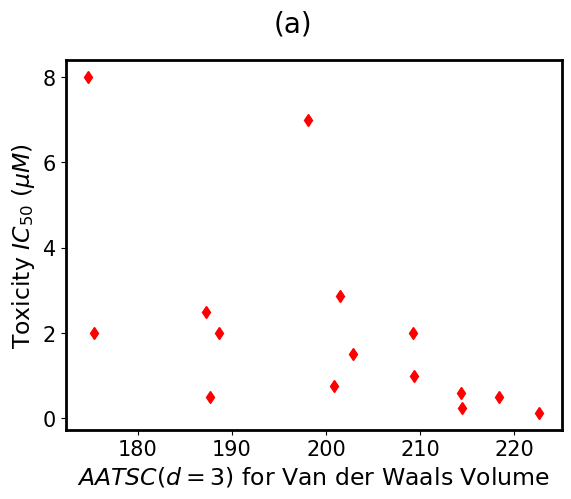

In [72]:
import matplotlib.pyplot as plt

plt.figure()
#ax = plt.gca()  # Get the current axes instance

columns = 'AATS3v'
plt.plot(descriptors_loaded3[columns], df2['Tox. IC50'], 'd', linewidth=7, color='red')
# Set the y-axis ticks and labels manually
# Set aspect of the plot to be equal
#plt.axis([-18, 17, 0, 15])

# Set the y-axis ticks and labels manually if needed
plt.grid(False)
#plt.xlabel('Autocorrelation of Sigma Electrons', fontsize=20)
plt.xlabel('$AATSC(d=3)$ for Van der Waals Volume', fontsize=17)

plt.ylabel('Toxicity $IC_{50}$ ($\mu M$)', fontsize=17)
# Set specific y-axis ticks
plt.tick_params(labelsize=15)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 3
plt.figtext(0.45, 0.94, '(a)', size=20)

plt.savefig('scatter_Tox_' + columns + '.pdf', bbox_inches='tight')

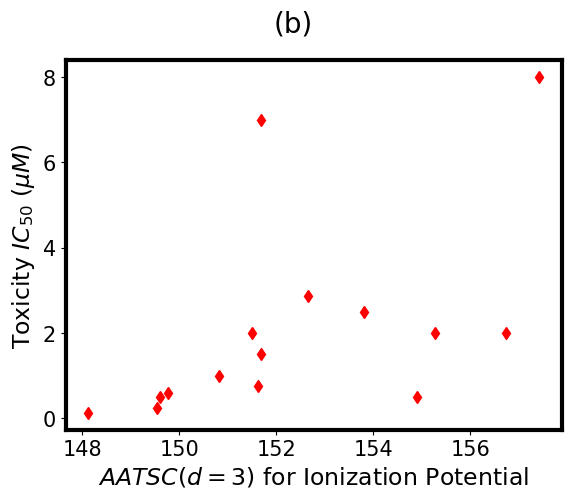

In [73]:
import matplotlib.pyplot as plt

plt.figure()
#ax = plt.gca()  # Get the current axes instance

columns = 'AATS3i'
plt.plot(descriptors_loaded3[columns], df2['Tox. IC50'], 'd', linewidth=7, color='red')
# Set the y-axis ticks and labels manually
# Set aspect of the plot to be equal
#plt.axis([-18, 17, 0, 15])

# Set the y-axis ticks and labels manually if needed
plt.grid(False)
#plt.xlabel('Autocorrelation of Sigma Electrons', fontsize=20)
plt.xlabel('$AATSC(d=3)$ for Ionization Potential', fontsize=17)

plt.ylabel('Toxicity $IC_{50}$ ($\mu M$)', fontsize=17)
# Set specific y-axis ticks
plt.tick_params(labelsize=15)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 3
plt.figtext(0.45, 0.94, '(b)', size=20)

plt.savefig('scatter_Tox_' + columns + '.pdf', bbox_inches='tight')

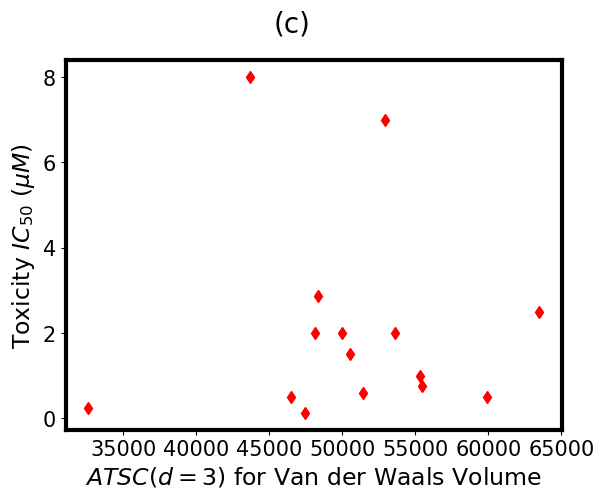

In [74]:
import matplotlib.pyplot as plt

plt.figure()
#ax = plt.gca()  # Get the current axes instance

columns = 'ATS3v'
plt.plot(descriptors_loaded3[columns], df2['Tox. IC50'], 'd', linewidth=7, color='red')
# Set the y-axis ticks and labels manually
# Set aspect of the plot to be equal
#plt.axis([-18, 17, 0, 15])

# Set the y-axis ticks and labels manually if needed
plt.grid(False)
#plt.xlabel('Autocorrelation of Sigma Electrons', fontsize=20)
plt.xlabel('$ATSC(d=3)$ for Van der Waals Volume', fontsize=17)

plt.ylabel('Toxicity $IC_{50}$ ($\mu M$)', fontsize=17)
# Set specific y-axis ticks
plt.tick_params(labelsize=15)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 3
plt.figtext(0.45, 0.94, '(c)', size=20)

plt.savefig('scatter_Tox_' + columns + '.pdf', bbox_inches='tight')

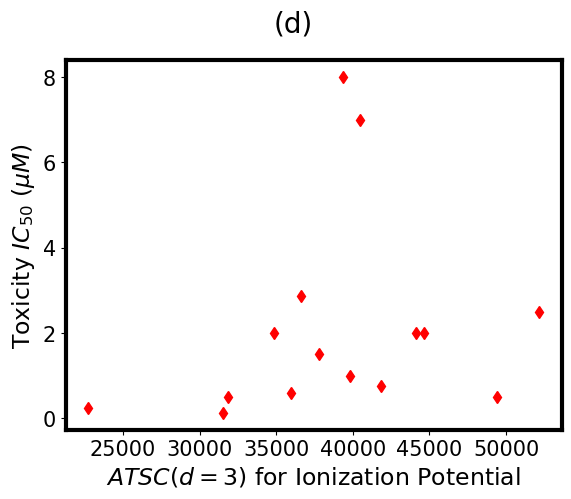

In [75]:
import matplotlib.pyplot as plt

plt.figure()
#ax = plt.gca()  # Get the current axes instance

columns = 'ATS3i'
plt.plot(descriptors_loaded3[columns], df2['Tox. IC50'], 'd', linewidth=7, color='red')
# Set the y-axis ticks and labels manually
# Set aspect of the plot to be equal
#plt.axis([-18, 17, 0, 15])

# Set the y-axis ticks and labels manually if needed
plt.grid(False)
#plt.xlabel('Autocorrelation of Sigma Electrons', fontsize=20)
plt.xlabel('$ATSC(d=3)$ for Ionization Potential', fontsize=17)

plt.ylabel('Toxicity $IC_{50}$ ($\mu M$)', fontsize=17)
# Set specific y-axis ticks
plt.tick_params(labelsize=15)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 3
plt.figtext(0.45, 0.94, '(d)', size=20)

plt.savefig('scatter_Tox_' + columns + '.pdf', bbox_inches='tight')

C:\Users\temih\Anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


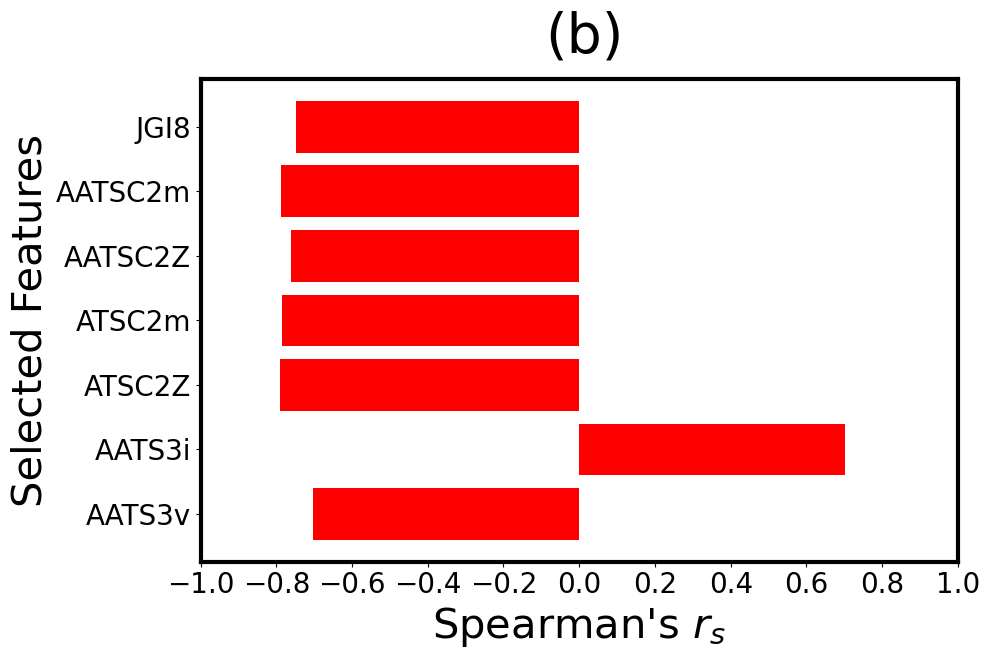

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from pandas.api.types import is_numeric_dtype

# Assuming Tr is defined somewhere above in your script
# Tr = ...

selected_features_TI = []
spearman_coefficients = [] 
feature_names = []

# Assuming descriptors_loaded3 and df2 are defined and loaded properly
# descriptors_loaded3 = ...
# df2 = ...

# Ensure the column 'Molecule #' is not in the list_descriptors if it's not a feature
#list_descriptors = [col for col in descriptors_loaded3.columns if col != 'Molecule #' and is_numeric_dtype(descriptors_loaded3[col])]

# Loop through each feature and calculate Spearman correlation
for column in list_descriptors:
    correlation, p_value = spearmanr(descriptors_loaded3[column], df2['Tox. IC50'])
    
    # Check if the absolute correlation is larger than Tr and p-value is less than 0.005
    if abs(correlation) > Tr and p_value < 0.005:
        selected_features_TI.append(column)
        spearman_coefficients.append(correlation)
        feature_names.append(column)

# Check if there are any significant features to plot
if feature_names:
    # Now, plot the significant Spearman correlation coefficients
    plt.figure(figsize=(10,6))  # Adjust the figure size as necessary, depending on the number of features
    #plt.figure(figsize=(8, len(feature_names) * 0.7))  # Adjust the figure size as necessary, depending on the number of features
    plt.barh(feature_names, spearman_coefficients, color='red')

    # Set the range and increments for the x-axis
    plt.xticks(np.arange(-1, 1.2, 0.2))  # np.arange includes the start value but excludes the end value, hence 1.2 to include 1.0

    # Add labels and title
    plt.xlabel("Spearman's $r_s$", fontsize=30)
    plt.ylabel('Selected Features', fontsize=30)
    #plt.title('Feature Importance based on Spearman Correlation')
    plt.tick_params(labelsize=20)
    plt.rcParams["axes.edgecolor"]="black"
    plt.rcParams["axes.linewidth"]=3
    # Rotate the feature names for better readability, if necessary
    plt.yticks(rotation=0)  
    
    plt.tight_layout()  # Adjust the layout

    # Save the plot
    plt.figtext(0.55,1.02,'(b)',size=40)
    plt.savefig('Tox_feature_importance.pdf', bbox_inches='tight')
    plt.show()  # Uncomment if you want to display the plot as well
else:
    print("No features met the significance criteria for plotting.")


In [77]:
selected_features_Tox

['AATS3v', 'AATS3i', 'ATSC2Z', 'ATSC2m', 'AATSC2Z', 'AATSC2m', 'JGI8']

In [78]:
i=0
feature_dict_Tox={}
for elements in df_mordred['name']:
    i=i+1
    for items in selected_features_Tox:
        if items==elements:
            print(elements,df_mordred['description'].loc[i])
            feature_dict_Tox[elements]=df_mordred['description'].loc[i]

AATS3v averaged moreau-broto autocorrelation of lag 4 weighted by vdw volume
AATS3i averaged moreau-broto autocorrelation of lag 4 weighted by ionization potential
ATSC2Z centered moreau-broto autocorrelation of lag 3 weighted by atomic number
ATSC2m centered moreau-broto autocorrelation of lag 3 weighted by mass
AATSC2Z averaged and centered moreau-broto autocorrelation of lag 3 weighted by atomic number
AATSC2m averaged and centered moreau-broto autocorrelation of lag 3 weighted by mass
JGI8 9-ordered mean topological charge


# Calculating Cosine similarity

In [88]:
import pandas as pd

# Assuming df is your dataframe
df_numeric = descriptors_loaded3.select_dtypes(include=['number'])
df_numeric1= df_numeric.drop(columns=['Tox. IC50','VDA IC50'])

df_numeric1

,nAcid,nBase,nAromAtom,nAromBond,nAtom,nHeavyAtom,nSpiro,nBridgehead,nHetero,nH,...,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2
0,1,2,20,22,95,47,0,0,4,48,...,8.078068,11.069369,102.579149,685.303161,7.213717,4600008380,88,262.0,323.0,9.694444
1,1,2,20,22,88,44,0,0,4,44,...,8.078068,10.982356,99.134194,645.271861,7.332635,4300007448,81,240.0,295.0,9.194444
2,1,2,20,22,107,51,0,0,4,56,...,8.078068,11.084801,106.786121,741.365761,6.928652,5000010854,92,278.0,339.0,10.694444
3,1,3,20,22,130,59,0,0,5,71,...,8.083637,11.133844,115.232263,854.486210,6.572971,5800016355,101,312.0,374.0,12.611111
4,1,2,20,22,121,57,0,0,6,64,...,8.078068,11.113268,113.090974,750.507464,6.202541,5600015770,99,302.0,364.0,12.277778
5,1,2,20,22,100,48,0,0,4,52,...,8.078068,10.999179,103.359531,701.334461,7.013345,4700009760,85,256.0,311.0,10.194444
6,1,1,20,22,84,43,0,0,3,41,...,8.072467,11.033227,98.291206,628.245311,7.479111,4200006681,83,244.0,304.0,8.777778
7,1,2,20,22,109,53,0,0,6,56,...,8.078068,11.088813,108.836424,773.355590,7.095005,5200011777,96,282.0,343.0,11.333333
8,1,2,20,22,95,46,0,0,4,49,...,8.078068,10.981914,101.205558,674.310437,7.098005,4500008556,83,246.0,301.0,9.861111
9,1,1,12,12,65,32,0,0,3,33,...,8.061171,10.608292,85.356135,536.168847,8.248751,3100003208,56,170.0,208.0,6.666667


In [89]:
def normalized_df(df0):
    scaler = MinMaxScaler()
    df_normalized = scaler.fit_transform(df0)
    scaled_features_df = pd.DataFrame(df_normalized, index=df0.index, columns=df0.columns)

    return scaled_features_df

In [90]:
scaled_df=normalized_df(df_numeric1)

In [91]:
scaled_df['Molecule']=descriptors_loaded3['Molecule']
scaled_df.set_index('Molecule', inplace=True)
scaled_df

,nAcid,nBase,nAromAtom,nAromBond,nAtom,nHeavyAtom,nSpiro,nBridgehead,nHetero,nH,...,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2
Molecule,,,,,,,,,,,,,,,,,,,,,
BL-204,0.0,0.5,1.0,1.0,0.461538,0.555556,0.0,0.0,0.333333,0.394737,...,0.752098,0.877319,0.576481,0.468508,0.547068,0.227273,0.711111,0.647887,0.692771,0.509346
GL-308-2,0.0,0.5,1.0,1.0,0.353846,0.444444,0.0,0.0,0.333333,0.289474,...,0.752098,0.711755,0.461173,0.342749,0.599107,0.181819,0.555556,0.492958,0.524096,0.425234
BL-141-2,0.0,0.5,1.0,1.0,0.646154,0.703704,0.0,0.0,0.333333,0.605263,...,0.752098,0.906682,0.717295,0.644630,0.422323,0.287880,0.800000,0.760563,0.789157,0.677570
BL-142,0.0,1.0,1.0,1.0,1.000000,1.000000,0.0,0.0,0.666667,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.266677,0.409092,1.000000,1.000000,1.000000,1.000000
Cy7.5-amine,0.0,0.5,1.0,1.0,0.861538,0.925926,0.0,0.0,1.000000,0.815789,...,0.752098,0.960849,0.928328,0.673349,0.104577,0.378789,0.955556,0.929577,0.939759,0.943925
GL-291-2,0.0,0.5,1.0,1.0,0.538462,0.592593,0.0,0.0,0.333333,0.500000,...,0.752098,0.743764,0.602601,0.518871,0.459385,0.242425,0.644444,0.605634,0.620482,0.593458
BL-141-1,0.0,0.0,1.0,1.0,0.292308,0.407407,0.0,0.0,0.000000,0.210526,...,0.502808,0.808550,0.432957,0.289260,0.663205,0.166667,0.600000,0.521127,0.578313,0.355140
GL-297-2,0.0,0.5,1.0,1.0,0.676923,0.777778,0.0,0.0,1.000000,0.605263,...,0.752098,0.914316,0.785921,0.745127,0.495120,0.318183,0.888889,0.788732,0.813253,0.785047
GL-286,0.0,0.5,1.0,1.0,0.461538,0.518519,0.0,0.0,0.333333,0.421053,...,0.752098,0.710914,0.530505,0.433974,0.496432,0.212122,0.600000,0.535211,0.560241,0.537383


In [155]:
#!pip install seaborn --upgrade
#!pip install matplotlib --upgrade



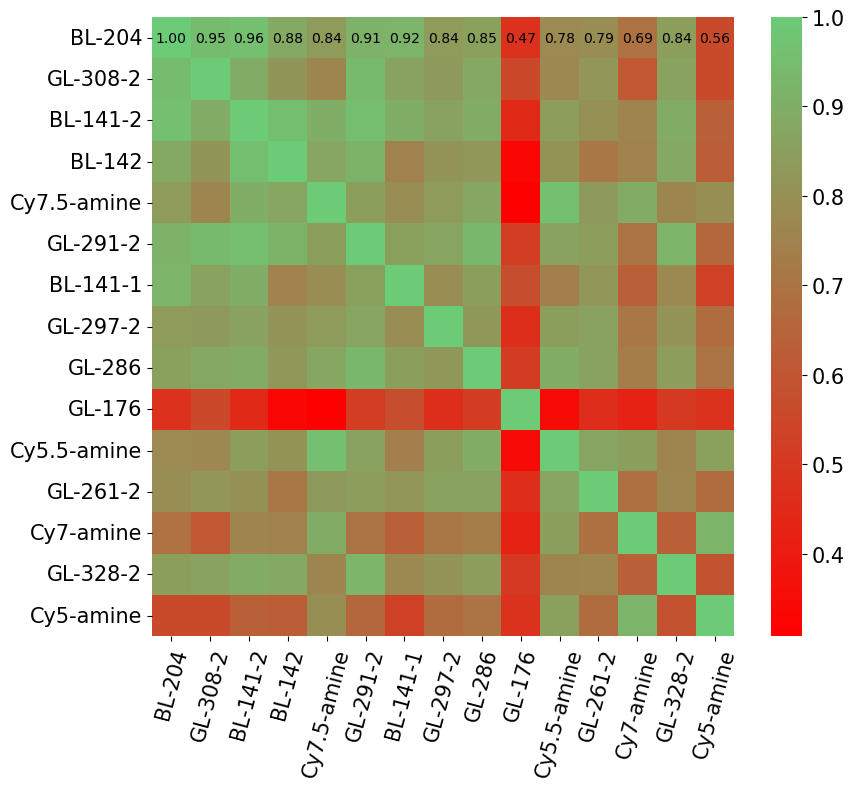

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib.colors import LinearSegmentedColormap

df = scaled_df  # Ensure selected_rows is defined and contains the data

# Compute cosine similarities
similarity_matrix = cosine_similarity(df)

# Define a custom colormap: green to red
#cmap = LinearSegmentedColormap.from_list('custom_green_red', ['green', 'red'], N=56)
cmap1 = LinearSegmentedColormap.from_list('custom_light_green_red', ['red','#6BCB77'], N=256)

# Create a heatmap
plt.figure(figsize=(9,8))
ax=sns.heatmap(similarity_matrix, annot=True, cmap=cmap1, xticklabels=df.index, yticklabels=df.index, annot_kws={"size": 10, "color": "black"}, fmt=".2f")  # Set annotation size and text color here

# Set title and labels with increased font sizes, if needed
#plt.title("Pairwise Cosine Similarity", fontsize=30)

plt.xticks(fontsize=15, rotation=75)
plt.yticks(fontsize=15 , rotation=0)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)  # Set the colorbar tick label size
plt.tight_layout()
plt.savefig('cosine_main.pdf')

plt.show()


# Including EPI data

In [132]:
df0 = pd.read_csv("MJH_Cancer_FlowCytometry.csv")
df0

,Molecule,SMILES_structures,VDA IC50,Tox. IC50,EPI
0,BL-204,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(C)C4=CC=C5C(...,0.12,0.600,4.6
1,GL-308-2,CC1(C)C(/C=C/C=C/C=C/C=C2N(C)C3=CC=C4C(C=CC=C4...,0.125,0.500,4.5
2,BL-141-2,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(C)C4=CC=C5C(...,0.15,0.750,2.5
3,BL-142,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(CCCCCCN(C)C)...,0.18,2.500,1.9
4,Cy7.5-amine,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(C)C4=CC=C5C(...,0.25,0.500,3.2
5,GL-356-2,CC1(C)C(/C=C/C=C/C=C/C=C2N(C)C3=CC=CC=C3C/2(C)...,0.26,NaN,NaN
6,GL-291-2,CC1(C)C(/C=C/C=C/C=C/C=C2N(C)C3=CC=C4C(C=CC=C4...,0.27,1.500,1.8
7,BL-141-1,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(C)C4=CC=C5C(...,0.3,0.125,3.6
8,GL-291-3,CC1(C)C(/C=C/C=C/C=C/C=C2N(CCCCCCN(C)C)C3=CC=C...,0.4,NaN,NaN
9,GL-249-2,CC1(C)C(/C=C/C2=C/C(CC(C(C)(C)C)C2)=C/C=C3N(C)...,NaN,NaN,NaN


In [133]:
df1=df0.dropna()
df = df1.reset_index(drop=True)
df

,Molecule,SMILES_structures,VDA IC50,Tox. IC50,EPI
0,BL-204,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(C)C4=CC=C5C(...,0.12,0.600,4.6
1,GL-308-2,CC1(C)C(/C=C/C=C/C=C/C=C2N(C)C3=CC=C4C(C=CC=C4...,0.125,0.500,4.5
2,BL-141-2,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(C)C4=CC=C5C(...,0.15,0.750,2.5
3,BL-142,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(CCCCCCN(C)C)...,0.18,2.500,1.9
4,Cy7.5-amine,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(C)C4=CC=C5C(...,0.25,0.500,3.2
5,GL-291-2,CC1(C)C(/C=C/C=C/C=C/C=C2N(C)C3=CC=C4C(C=CC=C4...,0.27,1.500,1.8
6,BL-141-1,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(C)C4=CC=C5C(...,0.3,0.125,3.6
7,GL-176,CC1(C)C(/C=C/C=C/C=C/C=C2N(C)C3=CC=CC=C3C/2(C)...,1.2,0.250,2.6
8,Cy5.5-amine,CC(C1=C(C=CC=C2)C2=CC=C1N/3C)(C)C3=C/C=C/C=C/C...,2,2.000,1.1
9,Cy7-amine,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(C)C4=CC=CC=C...,3.5,2.000,2.4


In [134]:
#mordred_descriptors = All_Mordred_descriptors(df2['SMILES_structures'])
#mordred_descriptors

In [135]:
#df3=df.reset_index()
#df3.drop(columns=['index'])

In [136]:
# Now we must merge two dataframes ddf2 and mordred_descriptors
#result = pd.concat([df3, mordred_descriptors], axis=1, join="inner")
#result


In [137]:
# Save result as a CSV file
#result.to_csv('dye_descriptors_EPI.csv', index=False)

In [138]:
descriptors_loaded = pd.read_csv('dye_descriptors_EPI.csv')
descriptors_loaded.head()

,index,Molecule,VDA-IC50,Tox-IC50,TI,EPI,SMILES_structures,ABC,ABCGG,nAcid,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0,BL-204,0.120,0.60,5.000000,4.6,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(C)C4=CC=C5C(...,37.082557,26.473751,1,...,11.069369,102.579149,733.289296,7.718835,4600008380,88,262,323,divide by zero encountered in power (mZagreb1),9.694444
1,1,GL-308-2,0.125,0.50,4.000000,4.5,CC1(C)C(/C=C/C=C/C=C/C=C2N(C)C3=CC=C4C(C=CC=C4...,34.254130,24.831699,1,...,10.982356,99.134194,693.257996,7.877932,4300007448,81,240,295,divide by zero encountered in power (mZagreb1),9.194444
2,2,BL-141-2,0.150,0.75,5.000000,2.5,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(C)C4=CC=C5C(...,39.910984,27.796131,1,...,11.084801,106.786121,789.351897,7.377121,5000010854,92,278,339,divide by zero encountered in power (mZagreb1),10.694444
3,3,BL-142,0.180,2.50,13.888889,1.9,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(CCCCCCN(C)C)...,45.677228,31.203270,1,...,11.133844,115.232263,854.486210,6.572971,5800016355,101,312,374,divide by zero encountered in power (mZagreb1),12.611111
4,4,Cy7.5-amine,0.250,0.50,2.000000,3.2,CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(C)C4=CC=C5C(...,44.044235,29.804131,1,...,11.113268,113.090975,782.469040,6.520575,5600015770,99,302,364,divide by zero encountered in power (mZagreb1),12.277778


In [139]:
descriptors_loaded2 = descriptors_loaded.drop(columns=['index'])
#descriptors_loaded2

In [140]:
import pandas as pd

# Assuming df is your dataframe
df_numeric = descriptors_loaded2.select_dtypes(include=['number'])
df_numeric1= df_numeric.drop(columns=['VDA-IC50','Tox-IC50','EPI'])

df_numeric1.head()


,TI,ABC,ABCGG,nAcid,nBase,nAromAtom,nAromBond,nAtom,nHeavyAtom,nSpiro,...,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2
0,5.000000,37.082557,26.473751,1,2,20,22,95,47,0,...,8.078068,11.069369,102.579149,733.289296,7.718835,4600008380,88,262,323,9.694444
1,4.000000,34.254130,24.831699,1,2,20,22,88,44,0,...,8.078068,10.982356,99.134194,693.257996,7.877932,4300007448,81,240,295,9.194444
2,5.000000,39.910984,27.796131,1,2,20,22,107,51,0,...,8.078068,11.084801,106.786121,789.351897,7.377121,5000010854,92,278,339,10.694444
3,13.888889,45.677228,31.203270,1,3,20,22,130,59,0,...,8.083637,11.133844,115.232263,854.486210,6.572971,5800016355,101,312,374,12.611111
4,2.000000,44.044235,29.804131,1,2,20,22,120,57,0,...,8.078068,11.113268,113.090975,782.469040,6.520575,5600015770,99,302,364,12.277778


In [141]:
list_descriptors = list(descriptors_loaded2.columns)
list_descriptors.remove('EPI')

In [142]:
Tr=0.845

C:\Users\temih\Anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\temih\Anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


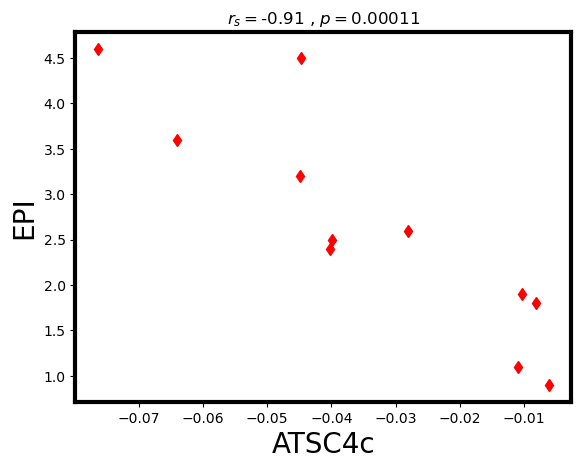

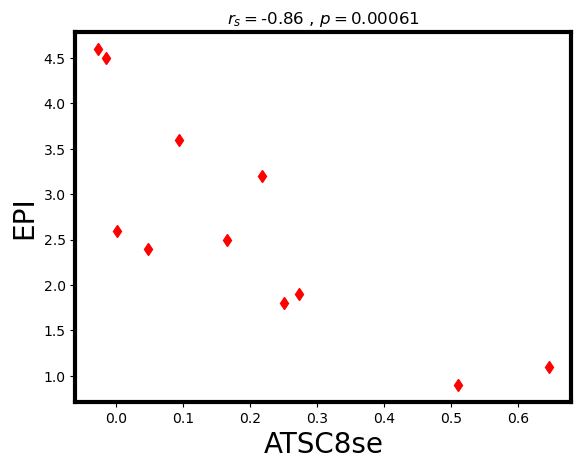

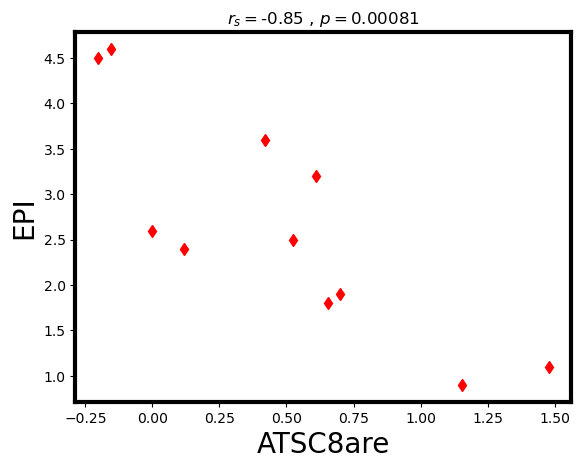

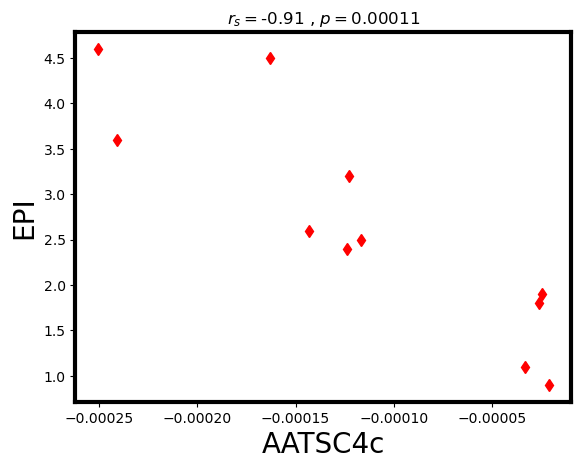

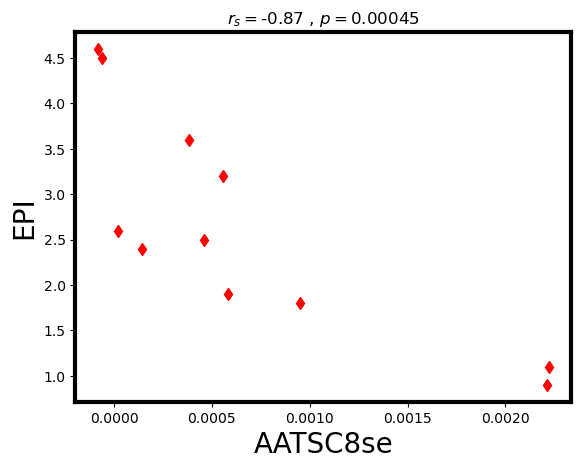

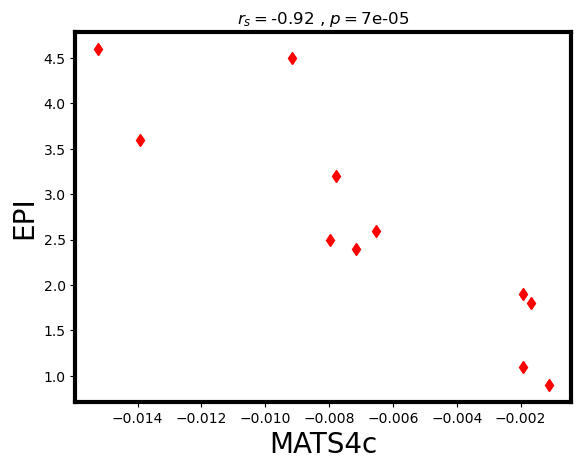

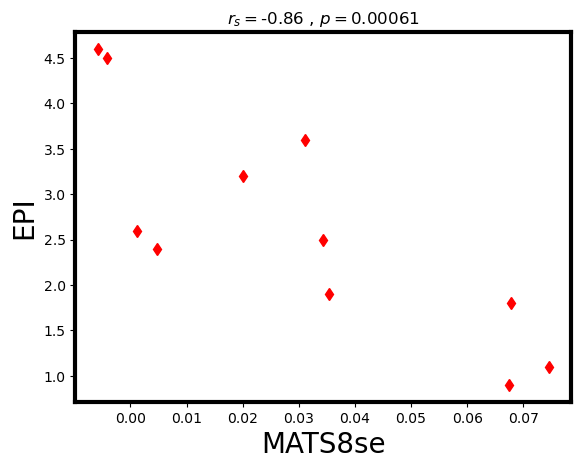

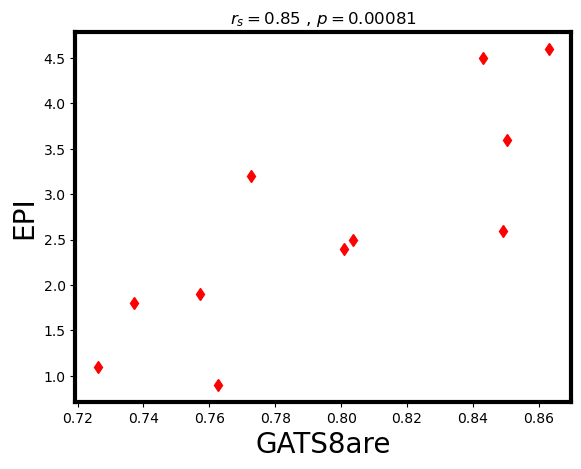

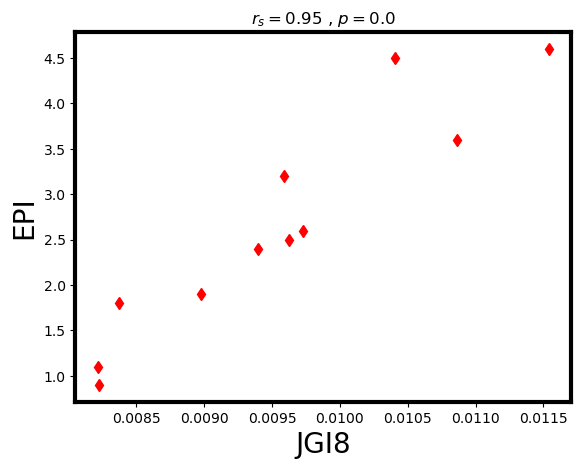

In [144]:
# now we can calculte correlations between each descriptor and toxcicity
selected_features_EPI = []
spearman_list= [] 
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
#for columns in descriptors_loaded.columns: #mordred_descriptors:
#    if is_numeric_dtype(mordred_descriptors[columns]):
for columns in list_descriptors:
    if is_numeric_dtype(descriptors_loaded2[columns]):
        d_array = np.array(list(descriptors_loaded2[columns]))
        #st=stats.spearmanr(mordred_descriptors[columns],ddf2['VDA IC50 ($\mu$M)'])
        #st=stats.spearmanr(mordred_descriptors[columns],ddf2['Tox. IC50 ($\mu$M)'])
        st=stats.spearmanr(descriptors_loaded2[columns],df['EPI'])
        spearman_list.append(st[0])
        if st[0]>Tr or st[0]<-Tr:
            if st[1]<0.005:
                
                plt.figure()
                #print(columns,st)
                selected_features_EPI.append(columns)
                #plt.plot(mordred_descriptors[columns],ddf2['VDA IC50 ($\mu$M)'],'d',linewidth=7, color='red')
                #plt.plot(np.log(mordred_descriptors[columns]),np.log(ddf2['Tox. IC50 ($\mu$M)']),'d',linewidth=7, color='red')
                #plt.plot(mordred_descriptors[columns],ddf2['Tox. IC50 ($\mu$M)'],'d',linewidth=7, color='red')
                plt.plot(descriptors_loaded2[columns],df['EPI'],'d',linewidth=7, color='red')

                #plt.axis([8, 12, 0.04, 1.6])
                plt.grid(False)
                plt.xlabel(columns,  fontsize=20)
                #plt.ylabel("VDA $IC_{50}$$\mu$M)" ,  fontsize=20)
                plt.ylabel('EPI' ,  fontsize=20)
                plt.tick_params(labelsize=10)
                plt.rcParams["axes.edgecolor"]="black"
                plt.rcParams["axes.linewidth"]=3
                #plt.title('$r_s=$' + str(round(st[0], 2)))
                plt.title('$r_s=$' + str(round(st[0], 2))+' , '+'$p=$' + str(round(st[1], 5)))

                #plt.legend(loc='upper right', fontsize=18)
                #plt.figtext(0.45,0.94,'(c)',size=20)
                plt.savefig('EPI_figs/EPI_'+columns+'.pdf', bbox_inches='tight')

                #plt.show()

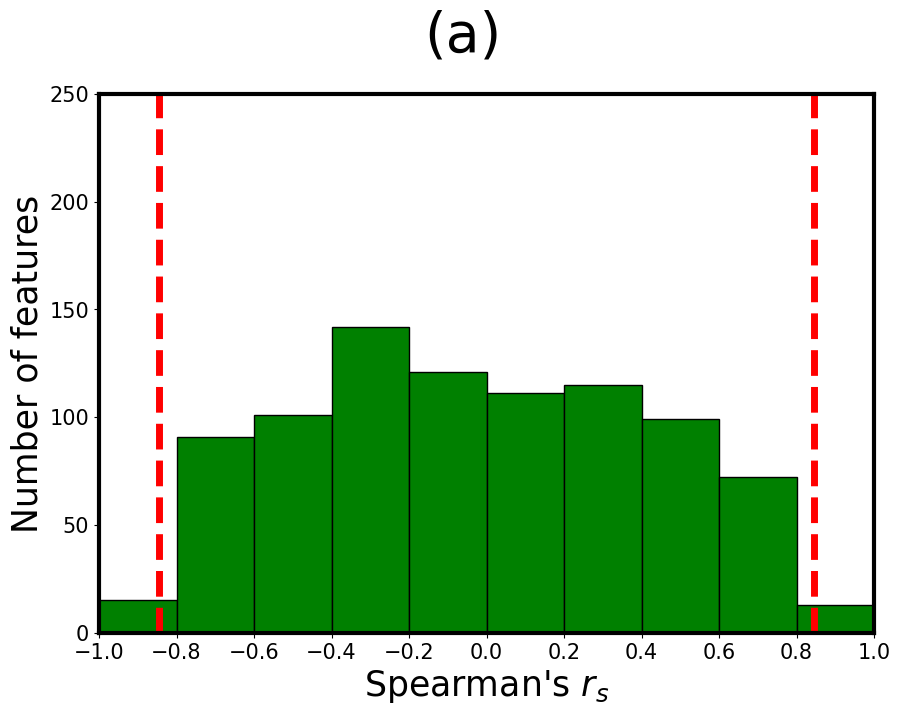

In [145]:
#import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
#plt.grid(False)
plt.hist(spearman_list, color = 'green', edgecolor = 'black',
        bins = [-1,-0.8,-0.60,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1.0])
#locs, labels = plt.yticks() 
plt.vlines(x=-Tr,ymin=0,ymax=387,color='r',linestyle='--',linewidth=5)
plt.vlines(x=Tr,ymin=0,ymax=387,color='r',linestyle='--',linewidth=5)

#plt.savefig('corr_distributions.pdf', bbox_inches='tight')
plt.ylim([0,250])
plt.xlim([-1,1])

plt.xlabel("Spearman's $r_s$" ,  fontsize=25)
#plt.xlabel("Distance in Selected Features" ,  fontsize=15)
plt.ylabel('Number of features',fontsize=25)
plt.xticks([-1,-0.8,-0.60,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(labelsize=15) #12.5
plt.rcParams["axes.edgecolor"]="black"
plt.rcParams["axes.linewidth"]=2
plt.figtext(0.45,0.94,'(a)',size=40)
plt.savefig('EPI_figs/EPI_histogram'+'.pdf', bbox_inches='tight')

C:\Users\temih\Anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


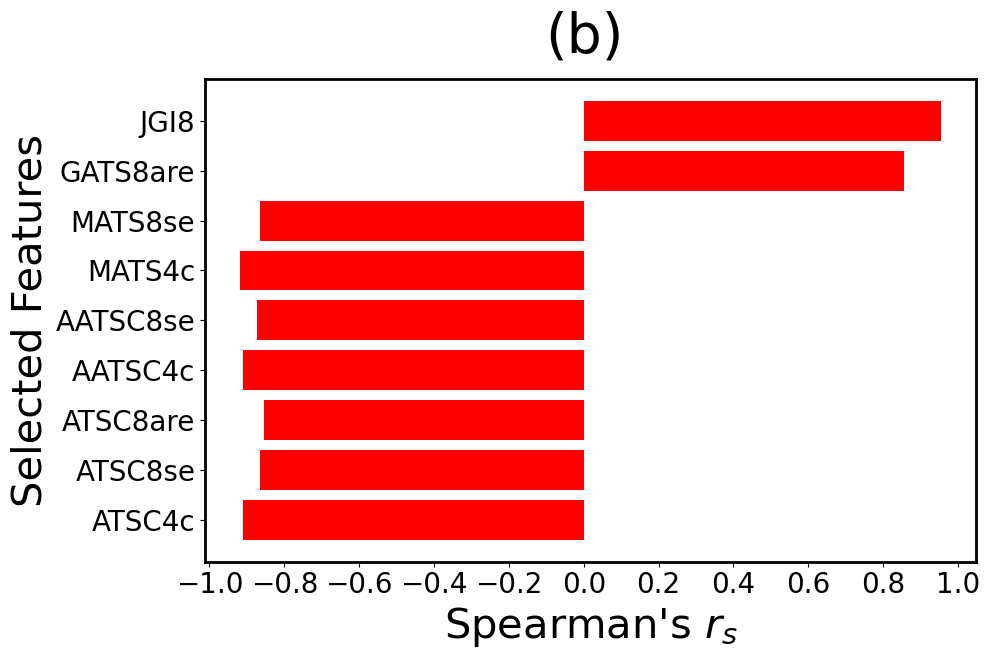

In [146]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from pandas.api.types import is_numeric_dtype

# Assuming Tr is defined somewhere above in your script
# Tr = ...
df2=df
selected_features_TI = []
spearman_coefficients = [] 
feature_names = []

# Assuming descriptors_loaded3 and df2 are defined and loaded properly
# descriptors_loaded3 = ...
# df2 = ...

# Ensure the column 'Molecule #' is not in the list_descriptors if it's not a feature
#list_descriptors = [col for col in descriptors_loaded3.columns if col != 'Molecule #' and is_numeric_dtype(descriptors_loaded3[col])]

# Loop through each feature and calculate Spearman correlation
for column in list_descriptors:
    correlation, p_value = spearmanr(descriptors_loaded2[column], df['EPI'])
    
    # Check if the absolute correlation is larger than Tr and p-value is less than 0.005
    if abs(correlation) > Tr and p_value < 0.005:
        selected_features_TI.append(column)
        spearman_coefficients.append(correlation)
        feature_names.append(column)

# Check if there are any significant features to plot
if feature_names:
    # Now, plot the significant Spearman correlation coefficients
    plt.figure(figsize=(10,6))  # Adjust the figure size as necessary, depending on the number of features
    #plt.figure(figsize=(8, len(feature_names) * 0.7))  # Adjust the figure size as necessary, depending on the number of features
    plt.barh(feature_names, spearman_coefficients, color='red')

    # Set the range and increments for the x-axis
    plt.xticks(np.arange(-1, 1.2, 0.2))  # np.arange includes the start value but excludes the end value, hence 1.2 to include 1.0

    # Add labels and title
    plt.xlabel("Spearman's $r_s$", fontsize=30)
    plt.ylabel('Selected Features', fontsize=30)
    #plt.title('Feature Importance based on Spearman Correlation')
    plt.tick_params(labelsize=20)
    plt.rcParams["axes.edgecolor"]="black"
    plt.rcParams["axes.linewidth"]=3
    # Rotate the feature names for better readability, if necessary
    plt.yticks(rotation=0)  
    
    plt.tight_layout()  # Adjust the layout

    # Save the plot
    plt.figtext(0.55,1.02,'(b)',size=40)
    plt.savefig('EPI_importance.pdf', bbox_inches='tight')
    plt.show()  # Uncomment if you want to display the plot as well
else:
    print("No features met the significance criteria for plotting.")


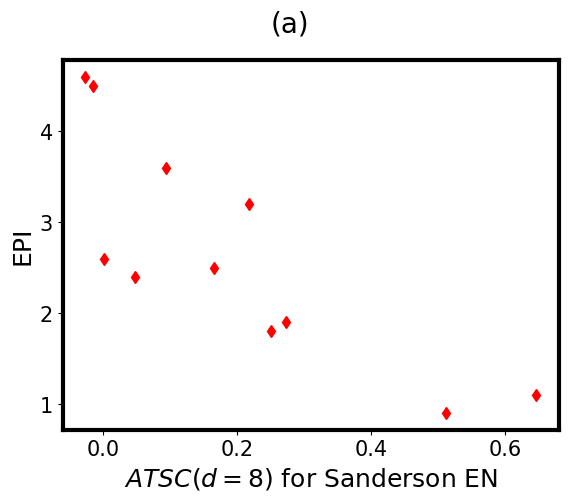

In [147]:
import matplotlib.pyplot as plt

plt.figure()
#ax = plt.gca()  # Get the current axes instance

columns = 'ATSC8se'
plt.plot(descriptors_loaded2[columns],df['EPI'], 'd', linewidth=7, color='red')

# Set the y-axis ticks and labels manually
# Set aspect of the plot to be equal
#plt.axis([-18, 17, 0, 15])

# Set the y-axis ticks and labels manually if needed
plt.grid(False)
plt.xlabel('$ATSC(d=8)$ for Sanderson EN', fontsize=18)

plt.ylabel('EPI', fontsize=18)
# Set specific y-axis ticks
plt.tick_params(labelsize=15)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 3
plt.figtext(0.45, 0.94, '(a)', size=20)

plt.savefig('scatter_EPI_' + columns + '.pdf', bbox_inches='tight')

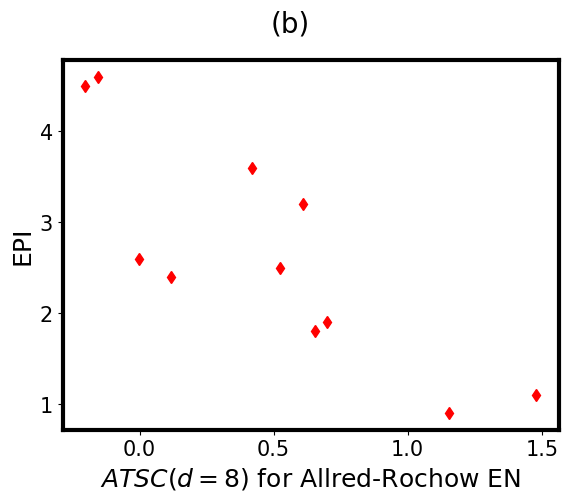

In [148]:
import matplotlib.pyplot as plt

plt.figure()
#ax = plt.gca()  # Get the current axes instance

columns = 'ATSC8are'
plt.plot(descriptors_loaded2[columns],df['EPI'], 'd', linewidth=7, color='red')
# Set the y-axis ticks and labels manually
# Set aspect of the plot to be equal
#plt.axis([-18, 17, 0, 15])

# Set the y-axis ticks and labels manually if needed
plt.grid(False)
plt.xlabel('$ATSC(d=8)$ for Allred-Rochow EN', fontsize=18)

plt.ylabel('EPI', fontsize=18)
# Set specific y-axis ticks
plt.tick_params(labelsize=15)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 3
plt.figtext(0.45, 0.94, '(b)', size=20)

plt.savefig('scatter_EPI_' + columns + '.pdf', bbox_inches='tight')

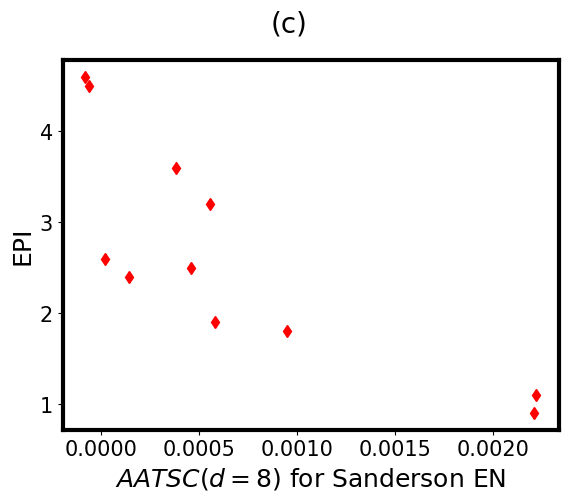

In [149]:
import matplotlib.pyplot as plt

plt.figure()
#ax = plt.gca()  # Get the current axes instance

columns = 'AATSC8se'
plt.plot(descriptors_loaded2[columns],df['EPI'], 'd', linewidth=7, color='red')

# Set the y-axis ticks and labels manually
# Set aspect of the plot to be equal
#plt.axis([-18, 17, 0, 15])

# Set the y-axis ticks and labels manually if needed
plt.grid(False)
plt.xlabel('$AATSC(d=8)$ for Sanderson EN', fontsize=18)

plt.ylabel('EPI', fontsize=18)
# Set specific y-axis ticks
plt.tick_params(labelsize=15)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 3
plt.figtext(0.45, 0.94, '(c)', size=20)

plt.savefig('scatter_EPI_' + columns + '.pdf', bbox_inches='tight')

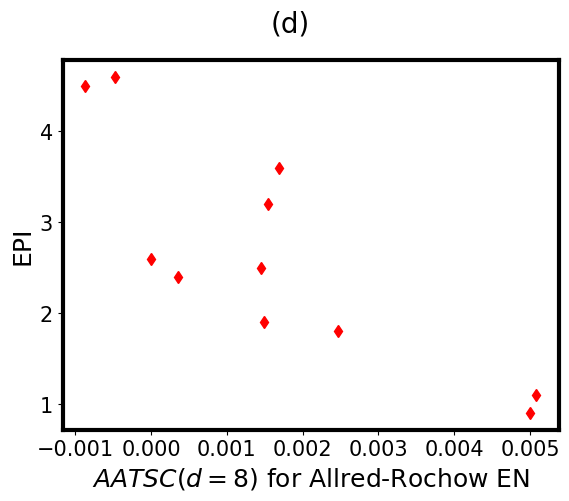

In [150]:
import matplotlib.pyplot as plt

plt.figure()
#ax = plt.gca()  # Get the current axes instance

columns = 'AATSC8are'
plt.plot(descriptors_loaded2[columns],df['EPI'], 'd', linewidth=7, color='red')
# Set the y-axis ticks and labels manually
# Set aspect of the plot to be equal
#plt.axis([-18, 17, 0, 15])

# Set the y-axis ticks and labels manually if needed
plt.grid(False)
plt.xlabel('$AATSC(d=8)$ for Allred-Rochow EN', fontsize=18)

plt.ylabel('EPI', fontsize=18)
# Set specific y-axis ticks
plt.tick_params(labelsize=15)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 3
plt.figtext(0.45, 0.94, '(d)', size=20)

plt.savefig('scatter_EPI_' + columns + '.pdf', bbox_inches='tight')

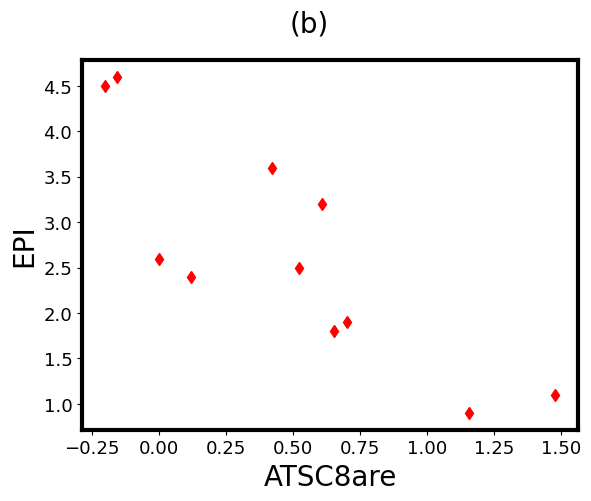

In [151]:
plt.figure()
columns='ATSC8are'
plt.plot(descriptors_loaded2[columns],df['EPI'],'d',linewidth=7, color='red')
#plt.axis([8, 12, 0.04, 1.6])
plt.grid(False)
plt.xlabel(columns,  fontsize=20)
plt.ylabel('EPI' ,  fontsize=20)
plt.tick_params(labelsize=13)
plt.rcParams["axes.edgecolor"]="black"
plt.rcParams["axes.linewidth"]=3
plt.figtext(0.45,0.94,'(b)',size=20)
plt.savefig('scatter_EPI_'+columns+'.pdf', bbox_inches='tight')

In [152]:
i=0
feature_dict_EPI={}
for elements in df_mordred['name']:
    i=i+1
    for items in selected_features_EPI:
        if items==elements:
            print(elements,df_mordred['description'].loc[i])
            feature_dict_Tox[elements]=df_mordred['description'].loc[i]

ATSC4c centered moreau-broto autocorrelation of lag 5 weighted by gasteiger charge
ATSC8se centered moreau-broto autocorrelation of lag 0 weighted by pauling EN
ATSC8are centered moreau-broto autocorrelation of lag 0 weighted by polarizability
AATSC4c averaged and centered moreau-broto autocorrelation of lag 5 weighted by gasteiger charge
AATSC8se averaged and centered moreau-broto autocorrelation of lag 0 weighted by pauling EN
MATS4c moran coefficient of lag 5 weighted by gasteiger charge
MATS8se moran coefficient of lag 1 weighted by pauling EN
GATS8are geary coefficient of lag 1 weighted by polarizability
JGI8 9-ordered mean topological charge


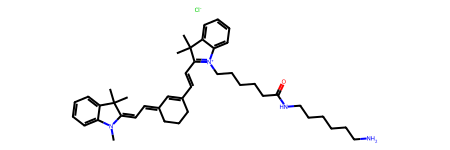

In [153]:
from rdkit import Chem
from rdkit.Chem import Draw

# Molecular structure to be visualized
smiles = "CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(C)C4=CC=CC=C4C/3(C)C)=[N+](CCCCCC(NCCCCCCN)=O)C5=CC=CC=C51.[Cl-]"

# Convert the SMILES string to an RDKit molecule object
molecule = Chem.MolFromSmiles(smiles)

# Generate an image of the molecule and save it as a PNG file
img_path = 'Cy7-amine.png'
Draw.MolToFile(molecule, img_path, size=(1500, 1500))
molecule

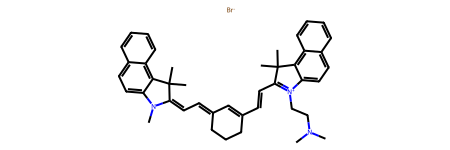

In [154]:
from rdkit import Chem
from rdkit.Chem import Draw

# Molecular structure to be visualized
smiles = "CC1(C)C(/C=C/C2=C/C(CCC2)=C/C=C3N(C)C4=CC=C5C(C=CC=C5)=C4C/3(C)C)=[N+](CCN(C)C)C6=CC=C(C=CC=C7)C7=C61.[Br-]"

# Convert the SMILES string to an RDKit molecule object
molecule = Chem.MolFromSmiles(smiles)

# Generate an image of the molecule and save it as a PNG file
img_path = 'BL-204.png'
Draw.MolToFile(molecule, img_path, size=(500, 500))
molecule